# Anomaly Detection Models

In [27]:
%matplotlib inline
import json, csv, sys, datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
import matplotlib.font_manager


This function extracts the features specified in the array from the json file provided to it and stores it in a csv file at the location provided to it. 

Edit the file locations (source json; destination csv) and run the code to generate the requisite datasets.

In [2]:

with open('../dataset/sample_first_50000.json', 'r') as file:
	i = 0
	j = 0
	# TODO: change list-based stuff to dict
	data = {}
	ipList = []
	# iterate over each logged line
	for line in file:
		newItem = {}
		try:
			jsonData = json.loads(line)
		except:
			print "\nLine {0} is not in JSON format".format(i)
			i += 1
			j += 1
			continue

		if 'data' in jsonData:
			timestamp = str(jsonData['data']['event_timestamp'])
			hour_of_the_day = (float(timestamp[11:13]) + float(timestamp[14:16])/60 + float(timestamp[17:19])/3600)
			# 0 - Monday; 6 - Sunday
			day_of_the_week = datetime.datetime(int(timestamp[:4]), \
				int(timestamp[5:7]), int(timestamp[8:10]), int(timestamp[11:13]), \
				int(timestamp[14:16]), int(timestamp[17:19])).weekday()
			newItem["hour_of_the_day"] = hour_of_the_day
			newItem["day_of_the_week"] = day_of_the_week
		
			featuresFromData = ["client_user", "client_host", "client_ip", "client_program", "CONNECT_DATA_INSTANCE_NAME", "service_name"]
			for feature in featuresFromData:
				if feature in jsonData['data']:
					newItem[feature] = str(jsonData['data'][feature])
				else:
					newItem[feature] = ""

		if 'metadata' in jsonData:
			featuresFromMetadata = ["oracle_sid", "hostname"]
			for feature in featuresFromMetadata:
				if feature in jsonData['metadata']:
					newItem[feature] = str(jsonData['metadata'][feature])
				else:
					newItem[feature] = ""

		# ignore cases where data is incomplete/very little to analyse
		if len(newItem) <= 2:
			continue

		else:
			data[i] = newItem
			ipList.append(newItem["client_ip"])
		# increment item number within the data
		i += 1

if j > 0:
	print "Could not store {0} lines due to invalid format".format(j)


Write the data extracted from the json file into a csv file

In [3]:
fieldNames = ['hour_of_the_day', 'day_of_the_week', 'client_user', 'client_host', 'client_ip', 'client_program', 'CONNECT_DATA_INSTANCE_NAME', 'service_name', 'oracle_sid', 'hostname']

with open('../dataset/preprocessed_first_50000.csv', 'w') as csvFile:
	writer = csv.DictWriter(csvFile, fieldnames=fieldNames)
	writer.writeheader()
	
	for item in data:
		writer.writerow(data[item])
print"Data written to file."

Data written to file.


Read in the data and store it in a dataframe

In [4]:
data = pd.read_csv('../dataset/preprocessed_first_50000.csv').fillna('0')
data = data.to_dict(orient='records')

DictVectorizer allows us to transform categorical data into numerical format

In [5]:
vec = DictVectorizer()
X = np.array(vec.fit_transform(data).toarray())

Robust Scaling works better for large sparse matrices (?)

In [6]:
X = preprocessing.robust_scale(X)
print "\nDimensions of feature matrix: ", X.shape
np.savetxt('../dataset/matX.txt', X)


Dimensions of feature matrix:  (50000, 588)


TruncatedSVD works better than PCA for our use-case

In [37]:
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

for i in xrange(len(X_svd)):
    print X_svd[i, 0], X_svd[i, 0]
    print X_svd[i, 0], X_svd[i, 0]


0.523200203313 0.523200203313
0.523200203313 0.523200203313
0.753884693052 0.753884693052
0.753884693052 0.753884693052
0.523200203313 0.523200203313
0.523200203313 0.523200203313
0.751393988474 0.751393988474
0.751393988474 0.751393988474
0.523200203313 0.523200203313
0.523200203313 0.523200203313
0.502555054109 0.502555054109
0.502555054109 0.502555054109
0.523200203313 0.523200203313
0.523200203313 0.523200203313
0.754599036686 0.754599036686
0.754599036686 0.754599036686
0.523200203313 0.523200203313
0.523200203313 0.523200203313
0.753357317571 0.753357317571
0.753357317571 0.753357317571
0.523200203313 0.523200203313
0.523200203313 0.523200203313
0.752642973937 0.752642973937
0.752642973937 0.752642973937
0.523200203313 0.523200203313
0.523200203313 0.523200203313
0.521965662058 0.521965662058
0.521965662058 0.521965662058
0.523200203313 0.523200203313
0.523200203313 0.523200203313
0.74893935017 0.74893935017
0.74893935017 0.74893935017
0.523200203313 0.523200203313
0.523200203313

0.509620249502 0.509620249502
0.509620249502 0.509620249502
0.730592436277 0.730592436277
0.730592436277 0.730592436277
0.76915346261 0.76915346261
0.76915346261 0.76915346261
0.731433478923 0.731433478923
0.731433478923 0.731433478923
0.675703397989 0.675703397989
0.675703397989 0.675703397989
0.512089332013 0.512089332013
0.512089332013 0.512089332013
0.731826977533 0.731826977533
0.731826977533 0.731826977533
0.754858595887 0.754858595887
0.754858595887 0.754858595887
0.718413084251 0.718413084251
0.718413084251 0.718413084251
0.766684537282 0.766684537282
0.766684537282 0.766684537282
0.512089332013 0.512089332013
0.512089332013 0.512089332013
0.764200327639 0.764200327639
0.764200327639 0.764200327639
0.749920430865 0.749920430865
0.749920430865 0.749920430865
0.712240377973 0.712240377973
0.712240377973 0.712240377973
0.513323873269 0.513323873269
0.513323873269 0.513323873269
0.510854790757 0.510854790757
0.510854790757 0.510854790757
0.509620249502 0.509620249502
0.509620249502

0.456877027652 0.456877027652
0.456877027652 0.456877027652
0.454407945141 0.454407945141
0.454407945141 0.454407945141
0.712617456137 0.712617456137
0.712617456137 0.712617456137
0.46499861882 0.46499861882
0.46499861882 0.46499861882
0.462529536309 0.462529536309
0.462529536309 0.462529536309
0.458825912542 0.458825912542
0.458825912542 0.458825912542
0.455642486397 0.455642486397
0.455642486397 0.455642486397
0.454407945141 0.454407945141
0.454407945141 0.454407945141
0.713485540833 0.713485540833
0.713485540833 0.713485540833
0.46499861882 0.46499861882
0.46499861882 0.46499861882
0.463764077564 0.463764077564
0.463764077564 0.463764077564
0.460060453798 0.460060453798
0.460060453798 0.460060453798
0.456877027652 0.456877027652
0.456877027652 0.456877027652
0.70540328619 0.70540328619
0.70540328619 0.70540328619
0.458111568908 0.458111568908
0.458111568908 0.458111568908
0.453173403886 0.453173403886
0.453173403886 0.453173403886
0.458111568908 0.458111568908
0.458111568908 0.45811

0.454065893001 0.454065893001
0.45159681049 0.45159681049
0.45159681049 0.45159681049
0.449127727979 0.449127727979
0.449127727979 0.449127727979
0.684838843615 0.684838843615
0.684838843615 0.684838843615
0.452831351745 0.452831351745
0.452831351745 0.452831351745
0.450362269234 0.450362269234
0.450362269234 0.450362269234
0.527874598174 0.527874598174
0.527874598174 0.527874598174
0.726596087897 0.726596087897
0.726596087897 0.726596087897
0.682274122369 0.682274122369
0.682274122369 0.682274122369
0.632709620517 0.632709620517
0.632709620517 0.632709620517
0.455300434257 0.455300434257
0.455300434257 0.455300434257
0.430951661285 0.430951661285
0.430951661285 0.430951661285
0.694397241256 0.694397241256
0.694397241256 0.694397241256
0.430951661285 0.430951661285
0.430951661285 0.430951661285
0.452831351745 0.452831351745
0.452831351745 0.452831351745
0.450362269234 0.450362269234
0.450362269234 0.450362269234
0.717728313299 0.717728313299
0.717728313299 0.717728313299
0.688224534978

0.4207332791 0.4207332791
0.4207332791 0.4207332791
0.419498737845 0.419498737845
0.419498737845 0.419498737845
0.416137166218 0.416137166218
0.416137166218 0.416137166218
0.423202361612 0.423202361612
0.423202361612 0.423202361612
0.421967820356 0.421967820356
0.421967820356 0.421967820356
0.4207332791 0.4207332791
0.4207332791 0.4207332791
31.9346981443 31.9346981443
31.9346981443 31.9346981443
0.414902624963 0.414902624963
0.414902624963 0.414902624963
0.423202361612 0.423202361612
0.423202361612 0.423202361612
0.4207332791 0.4207332791
0.4207332791 0.4207332791
0.419498737845 0.419498737845
0.419498737845 0.419498737845
0.701185742013 0.701185742013
0.701185742013 0.701185742013
0.423202361612 0.423202361612
0.423202361612 0.423202361612
0.421967820356 0.421967820356
0.421967820356 0.421967820356
0.4207332791 0.4207332791
0.4207332791 0.4207332791
31.9547258904 31.9547258904
31.9547258904 31.9547258904
0.416137166218 0.416137166218
0.416137166218 0.416137166218
0.423202361612 0.423

0.647150872239 0.647150872239
31.5522710898 31.5522710898
31.5522710898 31.5522710898
0.672118511297 0.672118511297
0.672118511297 0.672118511297
0.686088966162 0.686088966162
0.686088966162 0.686088966162
0.682673502433 0.682673502433
0.682673502433 0.682673502433
31.579848554 31.579848554
31.579848554 31.579848554
31.554947374 31.554947374
31.554947374 31.554947374
0.642803923502 0.642803923502
0.642803923502 0.642803923502
0.691301033472 0.691301033472
0.691301033472 0.691301033472
0.69008578201 0.69008578201
0.69008578201 0.69008578201
31.5641973107 31.5641973107
31.5641973107 31.5641973107
31.5706942424 31.5706942424
31.5706942424 31.5706942424
0.687628940686 0.687628940686
0.687628940686 0.687628940686
0.675877008387 0.675877008387
0.675877008387 0.675877008387
0.636726171468 0.636726171468
0.636726171468 0.636726171468
31.5973443014 31.5973443014
31.5973443014 31.5973443014
31.5529008162 31.5529008162
31.5529008162 31.5529008162
0.660162243063 0.660162243063
0.660162243063 0.660

0.396042453989 0.396042453989
0.393573371478 0.393573371478
0.393573371478 0.393573371478
31.2257477962 31.2257477962
31.2257477962 31.2257477962
31.2225536083 31.2225536083
31.2225536083 31.2225536083
0.394807912733 0.394807912733
0.394807912733 0.394807912733
0.392338830222 0.392338830222
0.392338830222 0.392338830222
31.2094861774 31.2094861774
31.2094861774 31.2094861774
31.2102081957 31.2102081957
31.2102081957 31.2102081957
31.1343913306 31.1343913306
31.1343913306 31.1343913306
31.0516920877 31.0516920877
31.0516920877 31.0516920877
0.66547460449 0.66547460449
0.66547460449 0.66547460449
0.380335469807 0.380335469807
0.380335469807 0.380335469807
0.375397304784 0.375397304784
0.375397304784 0.375397304784
31.1078362378 31.1078362378
31.1078362378 31.1078362378
31.0608287038 31.0608287038
31.0608287038 31.0608287038
0.665375426804 0.665375426804
0.665375426804 0.665375426804
0.380335469807 0.380335469807
0.380335469807 0.380335469807
0.37663184604 0.37663184604
0.37663184604 0.37

0.357593529585 0.357593529585
0.613916237975 0.613916237975
0.613916237975 0.613916237975
30.5152564351 30.5152564351
30.5152564351 30.5152564351
30.5080563892 30.5080563892
30.5080563892 30.5080563892
30.6189522518 30.6189522518
30.6189522518 30.6189522518
30.5615792093 30.5615792093
30.5615792093 30.5615792093
30.5152564351 30.5152564351
30.5152564351 30.5152564351
30.4890012331 30.4890012331
30.4890012331 30.4890012331
30.4892361025 30.4892361025
30.4892361025 30.4892361025
30.6756518321 30.6756518321
30.6756518321 30.6756518321
30.5949118232 30.5949118232
30.5949118232 30.5949118232
30.4833750527 30.4833750527
30.4833750527 30.4833750527
30.5356538429 30.5356538429
30.5356538429 30.5356538429
30.4976580432 30.4976580432
30.4976580432 30.4976580432
30.4704431905 30.4704431905
30.4704431905 30.4704431905
30.69097885 30.69097885
30.69097885 30.69097885
30.6714383597 30.6714383597
30.6714383597 30.6714383597
30.5818936806 30.5818936806
30.5818936806 30.5818936806
30.5294661154 30.52946

0.588431251001 0.588431251001
0.370117087622 0.370117087622
0.370117087622 0.370117087622
0.372586170133 0.372586170133
0.372586170133 0.372586170133
0.371351628877 0.371351628877
0.371351628877 0.371351628877
0.628350340735 0.628350340735
0.628350340735 0.628350340735
0.585577603792 0.585577603792
0.585577603792 0.585577603792
0.589461234532 0.589461234532
0.589461234532 0.589461234532
0.371351628877 0.371351628877
0.371351628877 0.371351628877
0.583276307674 0.583276307674
0.583276307674 0.583276307674
0.588046686303 0.588046686303
0.588046686303 0.588046686303
0.589461234532 0.589461234532
0.589461234532 0.589461234532
0.370117087622 0.370117087622
0.370117087622 0.370117087622
0.371351628877 0.371351628877
0.371351628877 0.371351628877
0.625942339368 0.625942339368
0.625942339368 0.625942339368
0.595453933836 0.595453933836
0.595453933836 0.595453933836
0.589665792257 0.589665792257
0.589665792257 0.589665792257
0.371351628877 0.371351628877
0.371351628877 0.371351628877
0.37258617

0.308211879362 0.308211879362
0.608590115801 0.608590115801
0.608590115801 0.608590115801
0.359006216322 0.359006216322
0.359006216322 0.359006216322
0.357771675066 0.357771675066
0.357771675066 0.357771675066
0.308211879362 0.308211879362
0.308211879362 0.308211879362
0.613524934371 0.613524934371
0.613524934371 0.613524934371
0.360240757577 0.360240757577
0.360240757577 0.360240757577
0.357771675066 0.357771675066
0.357771675066 0.357771675066
0.35653713381 0.35653713381
0.35653713381 0.35653713381
0.309446420617 0.309446420617
0.309446420617 0.309446420617
0.306977338106 0.306977338106
0.306977338106 0.306977338106
0.602414063071 0.602414063071
0.602414063071 0.602414063071
0.359006216322 0.359006216322
0.359006216322 0.359006216322
0.35653713381 0.35653713381
0.35653713381 0.35653713381
0.309446420617 0.309446420617
0.309446420617 0.309446420617
0.306977338106 0.306977338106
0.306977338106 0.306977338106
0.360240757577 0.360240757577
0.360240757577 0.360240757577
0.359006216322 0.3

0.304508255595 0.304508255595
0.304508255595 0.304508255595
0.303273714339 0.303273714339
0.303273714339 0.303273714339
0.300804631828 0.300804631828
0.300804631828 0.300804631828
0.299570090573 0.299570090573
0.299570090573 0.299570090573
0.295003829343 0.295003829343
0.295003829343 0.295003829343
0.305742796851 0.305742796851
0.305742796851 0.305742796851
0.304508255595 0.304508255595
0.304508255595 0.304508255595
0.302039173084 0.302039173084
0.302039173084 0.302039173084
0.300804631828 0.300804631828
0.300804631828 0.300804631828
0.298335549317 0.298335549317
0.298335549317 0.298335549317
0.552127092912 0.552127092912
0.552127092912 0.552127092912
0.532882256041 0.532882256041
0.532882256041 0.532882256041
0.304508255595 0.304508255595
0.304508255595 0.304508255595
0.303273714339 0.303273714339
0.303273714339 0.303273714339
0.300804631828 0.300804631828
0.300804631828 0.300804631828
0.299570090573 0.299570090573
0.299570090573 0.299570090573
0.297101008062 0.297101008062
0.29710100

28.8600917713 28.8600917713
28.8600917713 28.8600917713
28.8399783025 28.8399783025
28.8399783025 28.8399783025
28.8119446623 28.8119446623
28.8119446623 28.8119446623
28.8270487452 28.8270487452
28.8270487452 28.8270487452
28.8843324702 28.8843324702
28.8843324702 28.8843324702
28.7764175324 28.7764175324
28.7764175324 28.7764175324
28.8230555336 28.8230555336
28.8230555336 28.8230555336
28.7912320275 28.7912320275
28.7912320275 28.7912320275
28.8379324254 28.8379324254
28.8379324254 28.8379324254
28.8719870577 28.8719870577
28.8719870577 28.8719870577
28.822419639 28.822419639
28.822419639 28.822419639
28.8208610176 28.8208610176
28.8208610176 28.8208610176
28.7638599501 28.7638599501
28.7638599501 28.7638599501
28.8473632165 28.8473632165
28.8473632165 28.8473632165
28.8399783025 28.8399783025
28.8399783025 28.8399783025
28.7714797801 28.7714797801
28.7714797801 28.7714797801
28.8596416451 28.8596416451
28.8596416451 28.8596416451
28.7370934442 28.7370934442
28.7370934442 28.7370934

0.302217318565 0.302217318565
0.300982777309 0.300982777309
0.300982777309 0.300982777309
0.299748236054 0.299748236054
0.299748236054 0.299748236054
0.298513694798 0.298513694798
0.298513694798 0.298513694798
0.521769314937 0.521769314937
0.521769314937 0.521769314937
0.267992215549 0.267992215549
0.267992215549 0.267992215549
0.265523133038 0.265523133038
0.265523133038 0.265523133038
0.261819509271 0.261819509271
0.261819509271 0.261819509271
0.266757674294 0.266757674294
0.266757674294 0.266757674294
0.264288591782 0.264288591782
0.264288591782 0.264288591782
0.261819509271 0.261819509271
0.261819509271 0.261819509271
0.265523133038 0.265523133038
0.265523133038 0.265523133038
0.263054050527 0.263054050527
0.263054050527 0.263054050527
0.260584968016 0.260584968016
0.260584968016 0.260584968016
0.266757674294 0.266757674294
0.266757674294 0.266757674294
0.264288591782 0.264288591782
0.264288591782 0.264288591782
0.261819509271 0.261819509271
0.261819509271 0.261819509271
0.26675767

0.249474096716 0.249474096716
0.249474096716 0.249474096716
0.503979983945 0.503979983945
0.503979983945 0.503979983945
0.537711275794 0.537711275794
0.537711275794 0.537711275794
0.249474096716 0.249474096716
0.249474096716 0.249474096716
0.253892064116 0.253892064116
0.253892064116 0.253892064116
0.503043346642 0.503043346642
0.503043346642 0.503043346642
0.525208101884 0.525208101884
0.525208101884 0.525208101884
0.249474096716 0.249474096716
0.249474096716 0.249474096716
0.253892064116 0.253892064116
0.253892064116 0.253892064116
0.503043346642 0.503043346642
0.503043346642 0.503043346642
0.532635954514 0.532635954514
0.532635954514 0.532635954514
0.249474096716 0.249474096716
0.249474096716 0.249474096716
0.252657522861 0.252657522861
0.252657522861 0.252657522861
0.446293890925 0.446293890925
0.446293890925 0.446293890925
0.24823955546 0.24823955546
0.24823955546 0.24823955546
0.252657522861 0.252657522861
0.252657522861 0.252657522861
0.487553869458 0.487553869458
0.487553869458

27.5887343121 27.5887343121
27.5752088908 27.5752088908
27.5752088908 27.5752088908
27.489115083 27.489115083
27.489115083 27.489115083
27.7152219012 27.7152219012
27.7152219012 27.7152219012
27.6411494259 27.6411494259
27.6411494259 27.6411494259
27.5336980105 27.5336980105
27.5336980105 27.5336980105
27.5164607591 27.5164607591
27.5164607591 27.5164607591
27.4423882837 27.4423882837
27.4423882837 27.4423882837
27.6992678311 27.6992678311
27.6992678311 27.6992678311
27.6523496147 27.6523496147
27.6523496147 27.6523496147
27.5782771393 27.5782771393
27.5782771393 27.5782771393
27.4951987645 27.4951987645
27.4951987645 27.4951987645
27.4566929302 27.4566929302
27.4566929302 27.4566929302
27.6992678311 27.6992678311
27.6992678311 27.6992678311
27.6077704858 27.6077704858
27.6077704858 27.6077704858
27.5511228805 27.5511228805
27.5511228805 27.5511228805
27.4698598478 27.4698598478
27.4698598478 27.4698598478
27.4085462339 27.4085462339
27.4085462339 27.4085462339
0.278761034709 0.2787610

0.21932490896 0.21932490896
0.216855826449 0.216855826449
0.216855826449 0.216855826449
0.221793991471 0.221793991471
0.221793991471 0.221793991471
0.218090367705 0.218090367705
0.218090367705 0.218090367705
0.215621285194 0.215621285194
0.215621285194 0.215621285194
0.21932490896 0.21932490896
0.21932490896 0.21932490896
0.216855826449 0.216855826449
0.216855826449 0.216855826449
0.220559450216 0.220559450216
0.220559450216 0.220559450216
0.216855826449 0.216855826449
0.216855826449 0.216855826449
0.220559450216 0.220559450216
0.220559450216 0.220559450216
0.218090367705 0.218090367705
0.218090367705 0.218090367705
0.214386743938 0.214386743938
0.214386743938 0.214386743938
0.209448578916 0.209448578916
0.209448578916 0.209448578916
0.504378661894 0.504378661894
0.504378661894 0.504378661894
0.211917661427 0.211917661427
0.211917661427 0.211917661427
0.466326246806 0.466326246806
0.466326246806 0.466326246806
0.466007108974 0.466007108974
0.466007108974 0.466007108974
0.214386743938 0

26.6140780852 26.6140780852
26.6140780852 26.6140780852
26.5400279434 26.5400279434
26.5400279434 26.5400279434
26.523379741 26.523379741
26.523379741 26.523379741
26.4843842694 26.4843842694
26.4843842694 26.4843842694
26.5090750945 26.5090750945
26.5090750945 26.5090750945
26.4659554681 26.4659554681
26.4659554681 26.4659554681
0.193399542593 0.193399542593
0.193399542593 0.193399542593
0.486475882376 0.486475882376
0.486475882376 0.486475882376
0.193399542593 0.193399542593
0.193399542593 0.193399542593
26.4482927585 26.4482927585
26.4482927585 26.4482927585
26.4966833558 26.4966833558
26.4966833558 26.4966833558
26.5214205071 26.5214205071
26.5214205071 26.5214205071
26.4323021904 26.4323021904
26.4323021904 26.4323021904
26.496729682 26.496729682
26.496729682 26.496729682
0.304687893438 0.304687893438
0.304687893438 0.304687893438
0.190930460082 0.190930460082
0.190930460082 0.190930460082
0.485239134256 0.485239134256
0.485239134256 0.485239134256
0.192165001338 0.192165001338
0.

26.0817380516 26.0817380516
26.0817380516 26.0817380516
0.469118566567 0.469118566567
0.469118566567 0.469118566567
26.1394524318 26.1394524318
26.1394524318 26.1394524318
0.4654149428 0.4654149428
0.4654149428 0.4654149428
26.0955930914 26.0955930914
26.0955930914 26.0955930914
26.1150455412 26.1150455412
26.1150455412 26.1150455412
26.1560632793 26.1560632793
26.1560632793 26.1560632793
26.0674114929 26.0674114929
26.0674114929 26.0674114929
0.465421162809 0.465421162809
0.465421162809 0.465421162809
26.1042125466 26.1042125466
26.1042125466 26.1042125466
26.0637078692 26.0637078692
26.0637078692 26.0637078692
0.418999363024 0.418999363024
0.418999363024 0.418999363024
26.1362436353 26.1362436353
26.1362436353 26.1362436353
26.0696733738 26.0696733738
26.0696733738 26.0696733738
0.414061198001 0.414061198001
0.414061198001 0.414061198001
26.1238982228 26.1238982228
26.1238982228 26.1238982228
26.0471217955 26.0471217955
26.0471217955 26.0471217955
26.0596707726 26.0596707726
26.05967

0.41207979702 0.41207979702
0.390025110268 0.390025110268
0.390025110268 0.390025110268
0.155500667463 0.155500667463
0.155500667463 0.155500667463
0.157597846181 0.157597846181
0.157597846181 0.157597846181
0.156363304926 0.156363304926
0.156363304926 0.156363304926
0.157597846181 0.157597846181
0.157597846181 0.157597846181
0.40768576601 0.40768576601
0.40768576601 0.40768576601
0.156363304926 0.156363304926
0.156363304926 0.156363304926
0.156363304926 0.156363304926
0.156363304926 0.156363304926
0.157597846181 0.157597846181
0.157597846181 0.157597846181
0.156363304926 0.156363304926
0.156363304926 0.156363304926
0.156363304926 0.156363304926
0.156363304926 0.156363304926
0.157597846181 0.157597846181
0.157597846181 0.157597846181
0.156363304926 0.156363304926
0.156363304926 0.156363304926
0.15512876367 0.15512876367
0.15512876367 0.15512876367
0.156363304926 0.156363304926
0.156363304926 0.156363304926
0.156363304926 0.156363304926
0.156363304926 0.156363304926
0.15512876367 0.1551

0.148956057392 0.148956057392
0.145252433626 0.145252433626
0.145252433626 0.145252433626
0.142783351115 0.142783351115
0.142783351115 0.142783351115
0.146486974881 0.146486974881
0.146486974881 0.146486974881
0.14401789237 0.14401789237
0.14401789237 0.14401789237
0.141548809859 0.141548809859
0.141548809859 0.141548809859
0.147721516137 0.147721516137
0.147721516137 0.147721516137
0.145252433626 0.145252433626
0.145252433626 0.145252433626
0.142783351115 0.142783351115
0.142783351115 0.142783351115
0.146486974881 0.146486974881
0.146486974881 0.146486974881
0.14401789237 0.14401789237
0.14401789237 0.14401789237
0.146486974881 0.146486974881
0.146486974881 0.146486974881
0.14401789237 0.14401789237
0.14401789237 0.14401789237
0.141548809859 0.141548809859
0.141548809859 0.141548809859
0.148956057392 0.148956057392
0.148956057392 0.148956057392
0.145252433626 0.145252433626
0.145252433626 0.145252433626
0.142783351115 0.142783351115
0.142783351115 0.142783351115
0.147721516137 0.14772

0.112440017347 0.112440017347
0.112440017347 0.112440017347
0.111919819725 0.111919819725
0.111919819725 0.111919819725
0.111919819725 0.111919819725
0.111919819725 0.111919819725
0.11068527847 0.11068527847
0.11068527847 0.11068527847
0.114909099858 0.114909099858
0.114909099858 0.114909099858
0.113674558602 0.113674558602
0.113674558602 0.113674558602
0.111205476091 0.111205476091
0.111205476091 0.111205476091
0.11068527847 0.11068527847
0.11068527847 0.11068527847
0.116143641113 0.116143641113
0.116143641113 0.116143641113
0.114909099858 0.114909099858
0.114909099858 0.114909099858
0.112440017347 0.112440017347
0.112440017347 0.112440017347
0.111919819725 0.111919819725
0.111919819725 0.111919819725
0.11068527847 0.11068527847
0.11068527847 0.11068527847
0.116143641113 0.116143641113
0.116143641113 0.116143641113
0.114909099858 0.114909099858
0.114909099858 0.114909099858
0.112440017347 0.112440017347
0.112440017347 0.112440017347
0.109450737214 0.109450737214
0.109450737214 0.10945

0.360219127836 0.360219127836
0.360219127836 0.360219127836
0.213330348164 0.213330348164
0.213330348164 0.213330348164
0.369920740501 0.369920740501
0.369920740501 0.369920740501
0.368218705939 0.368218705939
0.368218705939 0.368218705939
0.401310262329 0.401310262329
0.401310262329 0.401310262329
0.367243808528 0.367243808528
0.367243808528 0.367243808528
0.213330348164 0.213330348164
0.213330348164 0.213330348164
0.118612723624 0.118612723624
0.118612723624 0.118612723624
0.373416514806 0.373416514806
0.373416514806 0.373416514806
0.401310262329 0.401310262329
0.401310262329 0.401310262329
0.36107110225 0.36107110225
0.36107110225 0.36107110225
0.212095806908 0.212095806908
0.212095806908 0.212095806908
0.369082217555 0.369082217555
0.369082217555 0.369082217555
0.405013886096 0.405013886096
0.405013886096 0.405013886096
0.404906751972 0.404906751972
0.404906751972 0.404906751972
0.213330348164 0.213330348164
0.213330348164 0.213330348164
0.118612723624 0.118612723624
0.118612723624

0.106981654703 0.106981654703
0.105747113447 0.105747113447
0.105747113447 0.105747113447
0.103278030936 0.103278030936
0.103278030936 0.103278030936
0.0888354396616 0.0888354396616
0.0888354396616 0.0888354396616
0.109450737214 0.109450737214
0.109450737214 0.109450737214
0.106981654703 0.106981654703
0.106981654703 0.106981654703
0.105747113447 0.105747113447
0.105747113447 0.105747113447
0.104512572192 0.104512572192
0.104512572192 0.104512572192
0.0900699809171 0.0900699809171
0.0900699809171 0.0900699809171
0.337316914442 0.337316914442
0.337316914442 0.337316914442
0.359524212835 0.359524212835
0.359524212835 0.359524212835
0.106981654703 0.106981654703
0.106981654703 0.106981654703
0.105747113447 0.105747113447
0.105747113447 0.105747113447
0.100094604791 0.100094604791
0.100094604791 0.100094604791
0.0988600635352 0.0988600635352
0.0988600635352 0.0988600635352
0.0963909810241 0.0963909810241
0.0963909810241 0.0963909810241
0.382769201538 0.382769201538
0.382769201538 0.3827692

0.173825027985 0.173825027985
0.366722018203 0.366722018203
0.366722018203 0.366722018203
23.8091333686 23.8091333686
23.8091333686 23.8091333686
0.0921671596359 0.0921671596359
0.0921671596359 0.0921671596359
0.0909326183803 0.0909326183803
0.0909326183803 0.0909326183803
0.329059427738 0.329059427738
0.329059427738 0.329059427738
0.181232275519 0.181232275519
0.181232275519 0.181232275519
0.179997734263 0.179997734263
0.179997734263 0.179997734263
0.179997734263 0.179997734263
0.179997734263 0.179997734263
0.176294110496 0.176294110496
0.176294110496 0.176294110496
0.175059569241 0.175059569241
0.175059569241 0.175059569241
0.173825027985 0.173825027985
0.173825027985 0.173825027985
23.8413207587 23.8413207587
23.8413207587 23.8413207587
0.0934017008915 0.0934017008915
0.0934017008915 0.0934017008915
0.0921671596359 0.0921671596359
0.0921671596359 0.0921671596359
0.367577322223 0.367577322223
0.367577322223 0.367577322223
0.365417101099 0.365417101099
0.365417101099 0.365417101099
0.

0.160245074174 0.160245074174
0.160245074174 0.160245074174
0.0766383209348 0.0766383209348
0.0766383209348 0.0766383209348
0.167652321707 0.167652321707
0.167652321707 0.167652321707
0.165183239196 0.165183239196
0.165183239196 0.165183239196
0.162714156685 0.162714156685
0.162714156685 0.162714156685
0.160245074174 0.160245074174
0.160245074174 0.160245074174
0.167652321707 0.167652321707
0.167652321707 0.167652321707
0.165183239196 0.165183239196
0.165183239196 0.165183239196
0.162714156685 0.162714156685
0.162714156685 0.162714156685
0.161479615429 0.161479615429
0.161479615429 0.161479615429
0.0766383209348 0.0766383209348
0.0766383209348 0.0766383209348
0.167652321707 0.167652321707
0.167652321707 0.167652321707
0.165183239196 0.165183239196
0.165183239196 0.165183239196
0.161479615429 0.161479615429
0.161479615429 0.161479615429
0.160245074174 0.160245074174
0.160245074174 0.160245074174
0.166417780452 0.166417780452
0.166417780452 0.166417780452
0.16394869794 0.16394869794
0.16

0.0674763345244 0.0674763345244
0.0650072520132 0.0650072520132
0.0650072520132 0.0650072520132
0.0637727107576 0.0637727107576
0.0637727107576 0.0637727107576
0.299344039472 0.299344039472
0.299344039472 0.299344039472
0.0674763345244 0.0674763345244
0.0674763345244 0.0674763345244
0.0650072520132 0.0650072520132
0.0650072520132 0.0650072520132
0.315080727634 0.315080727634
0.315080727634 0.315080727634
0.293171333194 0.293171333194
0.293171333194 0.293171333194
0.0674763345244 0.0674763345244
0.0674763345244 0.0674763345244
0.0662417932688 0.0662417932688
0.0662417932688 0.0662417932688
0.0637727107576 0.0637727107576
0.0637727107576 0.0637727107576
0.337715592391 0.337715592391
0.337715592391 0.337715592391
0.0674763345244 0.0674763345244
0.0674763345244 0.0674763345244
0.0650072520132 0.0650072520132
0.0650072520132 0.0650072520132
0.0637727107576 0.0637727107576
0.0637727107576 0.0637727107576
0.286323644799 0.286323644799
0.286323644799 0.286323644799
0.0674763345244 0.0674763345

22.3688738495 22.3688738495
0.276280704438 0.276280704438
0.276280704438 0.276280704438
0.0531820370789 0.0531820370789
0.0531820370789 0.0531820370789
0.0519474958233 0.0519474958233
0.0519474958233 0.0519474958233
0.0494784133122 0.0494784133122
0.0494784133122 0.0494784133122
22.3574021695 22.3574021695
22.3574021695 22.3574021695
0.31229686801 0.31229686801
0.31229686801 0.31229686801
0.0531820370789 0.0531820370789
0.0531820370789 0.0531820370789
0.0519474958233 0.0519474958233
0.0519474958233 0.0519474958233
0.0494784133122 0.0494784133122
0.0494784133122 0.0494784133122
22.3207891372 22.3207891372
22.3207891372 22.3207891372
0.309827545198 0.309827545198
0.309827545198 0.309827545198
0.0531820370789 0.0531820370789
0.0531820370789 0.0531820370789
0.0507129545677 0.0507129545677
0.0507129545677 0.0507129545677
0.0494784133122 0.0494784133122
0.0494784133122 0.0494784133122
22.3493961686 22.3493961686
22.3493961686 22.3493961686
22.3265163045 22.3265163045
22.3265163045 22.3265163

0.0390818856461 0.0390818856461
0.0366128031349 0.0366128031349
0.0366128031349 0.0366128031349
0.0341437206238 0.0341437206238
0.0341437206238 0.0341437206238
0.0321948357341 0.0321948357341
0.0321948357341 0.0321948357341
0.0415509681573 0.0415509681573
0.0415509681573 0.0415509681573
0.0390818856461 0.0390818856461
0.0390818856461 0.0390818856461
0.0366128031349 0.0366128031349
0.0366128031349 0.0366128031349
0.0341437206238 0.0341437206238
0.0341437206238 0.0341437206238
0.0321948357341 0.0321948357341
0.0321948357341 0.0321948357341
0.0427855094128 0.0427855094128
0.0427855094128 0.0427855094128
0.0403164269017 0.0403164269017
0.0403164269017 0.0403164269017
0.0366128031349 0.0366128031349
0.0366128031349 0.0366128031349
0.0353782618794 0.0353782618794
0.0353782618794 0.0353782618794
0.0334293769897 0.0334293769897
0.0334293769897 0.0334293769897
0.0440200506684 0.0440200506684
0.0440200506684 0.0440200506684
0.0403164269017 0.0403164269017
0.0403164269017 0.0403164269017
0.037847

0.221619397487 0.221619397487
0.0193292255569 0.0193292255569
0.0193292255569 0.0193292255569
0.0156256017902 0.0156256017902
0.0156256017902 0.0156256017902
21.5815110949 21.5815110949
21.5815110949 21.5815110949
21.4892445808 21.4892445808
21.4892445808 21.4892445808
0.271665703906 0.271665703906
0.271665703906 0.271665703906
0.0193292255569 0.0193292255569
0.0193292255569 0.0193292255569
0.0156256017902 0.0156256017902
0.0156256017902 0.0156256017902
21.5696755309 21.5696755309
21.5696755309 21.5696755309
21.477179903 21.477179903
21.477179903 21.477179903
-0.0148660258069 -0.0148660258069
-0.0148660258069 -0.0148660258069
0.270637242433 0.270637242433
0.270637242433 0.270637242433
0.0143910605346 0.0143910605346
0.0143910605346 0.0143910605346
21.5820209435 21.5820209435
21.5820209435 21.5820209435
21.477179903 21.477179903
21.477179903 21.477179903
0.267962080139 0.267962080139
0.267962080139 0.267962080139
0.0193292255569 0.0193292255569
0.0193292255569 0.0193292255569
0.01439106

0.221772498095 0.221772498095
0.221772498095 0.221772498095
0.218026058591 0.218026058591
0.218026058591 0.218026058591
0.216834333072 0.216834333072
0.216834333072 0.216834333072
0.221772498095 0.221772498095
0.221772498095 0.221772498095
0.256868935427 0.256868935427
0.256868935427 0.256868935427
0.221772498095 0.221772498095
0.221772498095 0.221772498095
0.211798430698 0.211798430698
0.211798430698 0.211798430698
0.212074177166 0.212074177166
0.212074177166 0.212074177166
0.218068874328 0.218068874328
0.218068874328 0.218068874328
-0.000423434532329 -0.000423434532329
-0.000423434532329 -0.000423434532329
-0.00289251704348 -0.00289251704348
-0.00289251704348 -0.00289251704348
-0.00536159955464 -0.00536159955464
-0.00536159955464 -0.00536159955464
-0.00783068206578 -0.00783068206578
-0.00783068206578 -0.00783068206578
0.212074177166 0.212074177166
0.212074177166 0.212074177166
0.195579846709 0.195579846709
0.195579846709 0.195579846709
0.120739753995 0.120739753995
0.120739753995 0.1

20.7364551497 20.7364551497
20.7364551497 20.7364551497
20.655192117 20.655192117
20.655192117 20.655192117
20.6265529956 20.6265529956
20.6265529956 20.6265529956
0.203254379261 0.203254379261
0.203254379261 0.203254379261
0.219078403253 0.219078403253
0.219078403253 0.219078403253
0.238224392676 0.238224392676
0.238224392676 0.238224392676
20.7472852862 20.7472852862
20.7472852862 20.7472852862
20.7116693583 20.7116693583
20.7116693583 20.7116693583
20.637596883 20.637596883
20.637596883 20.637596883
-0.0238797183883 -0.0238797183883
-0.0238797183883 -0.0238797183883
-0.027583342155 -0.027583342155
-0.027583342155 -0.027583342155
0.206753445303 0.206753445303
0.206753445303 0.206753445303
0.213130709306 0.213130709306
0.213130709306 0.213130709306
20.7364551497 20.7364551497
20.7364551497 20.7364551497
20.7006254709 20.7006254709
20.7006254709 20.7006254709
20.5811196417 20.5811196417
20.5811196417 20.5811196417
-0.0251142596439 -0.0251142596439
-0.0251142596439 -0.0251142596439
-0.0

0.183501719172 0.183501719172
0.183501719172 0.183501719172
-0.0764447947566 -0.0764447947566
-0.0764447947566 -0.0764447947566
0.181032636661 0.181032636661
0.181032636661 0.181032636661
0.212531101071 0.212531101071
0.212531101071 0.212531101071
0.174428908321 0.174428908321
0.174428908321 0.174428908321
0.104690717673 0.104690717673
0.104690717673 0.104690717673
0.188439884194 0.188439884194
0.188439884194 0.188439884194
0.177329012894 0.177329012894
0.177329012894 0.177329012894
0.18553042229 0.18553042229
0.18553042229 0.18553042229
0.177329012894 0.177329012894
0.177329012894 0.177329012894
0.177653979526 0.177653979526
0.177653979526 0.177653979526
0.104690717673 0.104690717673
0.104690717673 0.104690717673
0.204186966503 0.204186966503
0.204186966503 0.204186966503
0.179798095405 0.179798095405
0.179798095405 0.179798095405
0.224398392096 0.224398392096
0.224398392096 0.224398392096
0.213596930625 0.213596930625
0.213596930625 0.213596930625
0.184736260428 0.184736260428
0.1847

-0.0926421249082 -0.0926421249082
-0.0893104049338 -0.0893104049338
-0.0893104049338 -0.0893104049338
0.159542973639 0.159542973639
0.159542973639 0.159542973639
-0.0974319961014 -0.0974319961014
-0.0974319961014 -0.0974319961014
-0.0999010786126 -0.0999010786126
-0.0999010786126 -0.0999010786126
0.0269206449724 0.0269206449724
0.0269206449724 0.0269206449724
-0.0905449461894 -0.0905449461894
-0.0905449461894 -0.0905449461894
-0.091779487445 -0.091779487445
-0.091779487445 -0.091779487445
-0.0999010786126 -0.0999010786126
-0.0999010786126 -0.0999010786126
0.197610955159 0.197610955159
0.197610955159 0.197610955159
-0.100049372442 -0.100049372442
-0.100049372442 -0.100049372442
-0.091779487445 -0.091779487445
-0.091779487445 -0.091779487445
-0.098666537357 -0.098666537357
-0.098666537357 -0.098666537357
-0.102370161124 -0.102370161124
-0.102370161124 -0.102370161124
-0.098814831186 -0.098814831186
-0.098814831186 -0.098814831186
-0.0905449461894 -0.0905449461894
-0.0905449461894 -0.0905

19.3278435771 19.3278435771
19.3278435771 19.3278435771
19.2944159969 19.2944159969
19.2944159969 19.2944159969
19.1917633042 19.1917633042
19.1917633042 19.1917633042
19.1796986264 19.1796986264
19.1796986264 19.1796986264
19.1451034889 19.1451034889
19.1451034889 19.1451034889
19.0833094422 19.0833094422
19.0833094422 19.0833094422
0.120230731047 0.120230731047
0.120230731047 0.120230731047
-0.115950114935 -0.115950114935
-0.115950114935 -0.115950114935
19.1743907019 19.1743907019
19.1743907019 19.1743907019
19.1531834665 19.1531834665
19.1531834665 19.1531834665
19.0709640297 19.0709640297
19.0709640297 19.0709640297
0.117753820784 0.117753820784
0.117753820784 0.117753820784
-0.115950114935 -0.115950114935
-0.115950114935 -0.115950114935
19.1635082977 19.1635082977
19.1635082977 19.1635082977
19.145036505 19.145036505
19.145036505 19.145036505
19.0436183536 19.0436183536
19.0436183536 19.0436183536
0.167888853092 0.167888853092
0.167888853092 0.167888853092
-0.117184656191 -0.11718

18.4240644117 18.4240644117
0.0762962687945 0.0762962687945
0.0762962687945 0.0762962687945
18.3669468973 18.3669468973
18.3669468973 18.3669468973
0.0762962687945 0.0762962687945
0.0762962687945 0.0762962687945
18.4383690582 18.4383690582
18.4383690582 18.4383690582
0.0775308100501 0.0775308100501
0.0775308100501 0.0775308100501
0.075061727539 0.075061727539
0.075061727539 0.075061727539
0.075061727539 0.075061727539
0.075061727539 0.075061727539
0.0738271862834 0.0738271862834
0.0738271862834 0.0738271862834
0.133890623236 0.133890623236
0.133890623236 0.133890623236
0.0762962687945 0.0762962687945
0.0762962687945 0.0762962687945
0.075061727539 0.075061727539
0.075061727539 0.075061727539
0.075061727539 0.075061727539
0.075061727539 0.075061727539
0.0738271862834 0.0738271862834
0.0738271862834 0.0738271862834
0.075061727539 0.075061727539
0.075061727539 0.075061727539
0.0738271862834 0.0738271862834
0.0738271862834 0.0738271862834
0.075061727539 0.075061727539
0.075061727539 0.07506

0.0651853974944 0.0651853974944
0.0651853974944 0.0651853974944
0.0639508562388 0.0639508562388
0.0639508562388 0.0639508562388
0.0627163149832 0.0627163149832
0.0627163149832 0.0627163149832
-0.17026993018 -0.17026993018
-0.17026993018 -0.17026993018
17.8340430091 17.8340430091
17.8340430091 17.8340430091
0.0954471717742 0.0954471717742
0.0954471717742 0.0954471717742
0.0664199387499 0.0664199387499
0.0664199387499 0.0664199387499
0.0664199387499 0.0664199387499
0.0664199387499 0.0664199387499
0.0651853974944 0.0651853974944
0.0651853974944 0.0651853974944
0.0639508562388 0.0639508562388
0.0639508562388 0.0639508562388
0.0627163149832 0.0627163149832
0.0627163149832 0.0627163149832
-0.167800847669 -0.167800847669
-0.167800847669 -0.167800847669
-0.00714641200039 -0.00714641200039
-0.00714641200039 -0.00714641200039
-0.168321045291 -0.168321045291
-0.168321045291 -0.168321045291
-0.173973553947 -0.173973553947
-0.173973553947 -0.173973553947
-0.164617421524 -0.164617421524
-0.164617421

0.0577781499609 0.0577781499609
0.0565436087053 0.0565436087053
0.0565436087053 0.0565436087053
0.0882063178761 0.0882063178761
0.0882063178761 0.0882063178761
0.0577781499609 0.0577781499609
0.0577781499609 0.0577781499609
0.0565436087053 0.0565436087053
0.0565436087053 0.0565436087053
0.101190313307 0.101190313307
0.101190313307 0.101190313307
0.0577781499609 0.0577781499609
0.0577781499609 0.0577781499609
0.0565436087053 0.0565436087053
0.0565436087053 0.0565436087053
0.0670527228959 0.0670527228959
0.0670527228959 0.0670527228959
0.00185903891714 0.00185903891714
0.00185903891714 0.00185903891714
0.058296146474 0.058296146474
0.058296146474 0.058296146474
0.0577781499609 0.0577781499609
0.0577781499609 0.0577781499609
0.0565436087053 0.0565436087053
0.0565436087053 0.0565436087053
0.0553090674498 0.0553090674498
0.0553090674498 0.0553090674498
0.0553090674498 0.0553090674498
0.0553090674498 0.0553090674498
0.0540745261942 0.0540745261942
0.0540745261942 0.0540745261942
0.1062022520

0.0778060218919 0.0778060218919
16.6450441363 16.6450441363
16.6450441363 16.6450441363
0.0475965546997 0.0475965546997
0.0475965546997 0.0475965546997
0.0826755409257 0.0826755409257
0.0826755409257 0.0826755409257
16.6159739952 16.6159739952
16.6159739952 16.6159739952
0.0827810648368 0.0827810648368
0.0827810648368 0.0827810648368
0.0678574591052 0.0678574591052
0.0678574591052 0.0678574591052
16.6562013338 16.6562013338
16.6562013338 16.6562013338
0.0815441436829 0.0815441436829
0.0815441436829 0.0815441436829
0.0479018199163 0.0479018199163
0.0479018199163 0.0479018199163
0.0479018199163 0.0479018199163
0.0479018199163 0.0479018199163
16.7100263217 16.7100263217
16.7100263217 16.7100263217
16.6315105086 16.6315105086
16.6315105086 16.6315105086
0.077460127163 0.077460127163
0.077460127163 0.077460127163
16.6640587075 16.6640587075
16.6640587075 16.6640587075
0.0729023548939 0.0729023548939
0.0729023548939 0.0729023548939
0.0752647066386 0.0752647066386
0.0752647066386 0.0752647066

0.0330873248494 0.0330873248494
0.0330873248494 0.0330873248494
0.0318527835938 0.0318527835938
0.0318527835938 0.0318527835938
0.0306182423382 0.0306182423382
0.0306182423382 0.0306182423382
0.0293837010826 0.0293837010826
0.0293837010826 0.0293837010826
0.0330873248494 0.0330873248494
0.0330873248494 0.0330873248494
0.0318527835938 0.0318527835938
0.0318527835938 0.0318527835938
0.0306182423382 0.0306182423382
0.0306182423382 0.0306182423382
0.0293837010826 0.0293837010826
0.0293837010826 0.0293837010826
16.2746817596 16.2746817596
16.2746817596 16.2746817596
16.237758832 16.237758832
16.237758832 16.237758832
16.126536809 16.126536809
16.126536809 16.126536809
16.2803909435 16.2803909435
16.2803909435 16.2803909435
16.2019794692 16.2019794692
16.2019794692 16.2019794692
16.2456116185 16.2456116185
16.2456116185 16.2456116185
16.2032140105 16.2032140105
16.2032140105 16.2032140105
16.2772864858 16.2772864858
16.2772864858 16.2772864858
16.2092973992 16.2092973992
16.2092973992 16.209

0.0256800773159 0.0256800773159
0.0244455360603 0.0244455360603
0.0244455360603 0.0244455360603
0.0232109948048 0.0232109948048
0.0232109948048 0.0232109948048
-0.250515111793 -0.250515111793
-0.250515111793 -0.250515111793
-0.255453276815 -0.255453276815
-0.255453276815 -0.255453276815
0.0269146185715 0.0269146185715
0.0269146185715 0.0269146185715
0.0256800773159 0.0256800773159
0.0256800773159 0.0256800773159
0.0232109948048 0.0232109948048
0.0232109948048 0.0232109948048
-0.250515111793 -0.250515111793
-0.250515111793 -0.250515111793
-0.255453276815 -0.255453276815
-0.255453276815 -0.255453276815
0.0232109948048 0.0232109948048
0.0232109948048 0.0232109948048
0.0232109948048 0.0232109948048
0.0232109948048 0.0232109948048
-0.25421873556 -0.25421873556
-0.25421873556 -0.25421873556
0.0244455360603 0.0244455360603
0.0244455360603 0.0244455360603
0.0232109948048 0.0232109948048
0.0232109948048 0.0232109948048
-0.00167617742783 -0.00167617742783
-0.00167617742783 -0.00167617742783
0.02

-0.0175839460488 -0.0175839460488
-0.0175839460488 -0.0175839460488
0.0147917152096 0.0147917152096
0.0147917152096 0.0147917152096
0.0235406381226 0.0235406381226
0.0235406381226 0.0235406381226
0.0246837145594 0.0246837145594
0.0246837145594 0.0246837145594
-0.070362812053 -0.070362812053
-0.070362812053 -0.070362812053
-0.0722134364174 -0.0722134364174
-0.0722134364174 -0.0722134364174
-0.0218581192727 -0.0218581192727
-0.0218581192727 -0.0218581192727
-0.0107832957928 -0.0107832957928
-0.0107832957928 -0.0107832957928
0.0172764670259 0.0172764670259
0.0172764670259 0.0172764670259
-0.072444150942 -0.072444150942
-0.072444150942 -0.072444150942
0.0198370143559 0.0198370143559
0.0198370143559 0.0198370143559
0.0160103131246 0.0160103131246
0.0160103131246 0.0160103131246
15.3319886927 15.3319886927
15.3319886927 15.3319886927
15.3674072469 15.3674072469
15.3674072469 15.3674072469
0.00173204594249 0.00173204594249
0.00173204594249 0.00173204594249
15.327929909 15.327929909
15.3279299

14.7641621118 14.7641621118
14.7641621118 14.7641621118
14.7661186715 14.7661186715
14.7661186715 14.7661186715
14.7192954213 14.7192954213
14.7192954213 14.7192954213
14.6053384938 14.6053384938
14.6053384938 14.6053384938
14.5594408459 14.5594408459
14.5594408459 14.5594408459
14.8401911468 14.8401911468
14.8401911468 14.8401911468
14.7353501063 14.7353501063
14.7353501063 14.7353501063
-0.0562556581308 -0.0562556581308
-0.0562556581308 -0.0562556581308
14.8031549091 14.8031549091
14.8031549091 14.8031549091
14.7201508305 14.7201508305
14.7201508305 14.7201508305
-0.0318977171996 -0.0318977171996
-0.0318977171996 -0.0318977171996
14.7933678966 14.7933678966
14.7933678966 14.7933678966
14.7537732589 14.7537732589
14.7537732589 14.7537732589
14.7192954213 14.7192954213
14.7192954213 14.7192954213
14.6140502489 14.6140502489
14.6140502489 14.6140502489
14.5686870368 14.5686870368
14.5686870368 14.5686870368
-0.0229964400466 -0.0229964400466
-0.0229964400466 -0.0229964400466
14.740859325

-0.0264740780043 -0.0264740780043
-0.0651363570164 -0.0651363570164
-0.0651363570164 -0.0651363570164
-0.321404160982 -0.321404160982
-0.321404160982 -0.321404160982
-0.124305614347 -0.124305614347
-0.124305614347 -0.124305614347
-0.0663780761315 -0.0663780761315
-0.0663780761315 -0.0663780761315
-0.0376878373358 -0.0376878373358
-0.0376878373358 -0.0376878373358
-0.0648456309235 -0.0648456309235
-0.0648456309235 -0.0648456309235
-0.315231454704 -0.315231454704
-0.315231454704 -0.315231454704
-0.320169619727 -0.320169619727
-0.320169619727 -0.320169619727
-0.0284049875485 -0.0284049875485
-0.0284049875485 -0.0284049875485
-0.313996913449 -0.313996913449
-0.313996913449 -0.313996913449
-0.318935078471 -0.318935078471
-0.318935078471 -0.318935078471
-0.0259311399181 -0.0259311399181
-0.0259311399181 -0.0259311399181
-0.312762372193 -0.312762372193
-0.312762372193 -0.312762372193
-0.318935078471 -0.318935078471
-0.318935078471 -0.318935078471
-0.0197694187685 -0.0197694187685
-0.019769418

-0.0607378105744 -0.0607378105744
-0.0607378105744 -0.0607378105744
-0.0545651042966 -0.0545651042966
-0.0545651042966 -0.0545651042966
-0.0582687280633 -0.0582687280633
-0.0582687280633 -0.0582687280633
-0.0607378105744 -0.0607378105744
-0.0607378105744 -0.0607378105744
-0.0545651042966 -0.0545651042966
-0.0545651042966 -0.0545651042966
-0.0582687280633 -0.0582687280633
-0.0582687280633 -0.0582687280633
-0.0607378105744 -0.0607378105744
-0.0607378105744 -0.0607378105744
-0.0545651042966 -0.0545651042966
-0.0545651042966 -0.0545651042966
-0.0570341868077 -0.0570341868077
-0.0570341868077 -0.0570341868077
-0.0595032693189 -0.0595032693189
-0.0595032693189 -0.0595032693189
-0.0656759755967 -0.0656759755967
-0.0656759755967 -0.0656759755967
-0.0848961949651 -0.0848961949651
-0.0848961949651 -0.0848961949651
-0.0557996455521 -0.0557996455521
-0.0557996455521 -0.0557996455521
-0.0595032693189 -0.0595032693189
-0.0595032693189 -0.0595032693189
0.0595343812 0.0595343812
0.0595343812 0.0595343

13.2162599598 13.2162599598
13.2162599598 13.2162599598
-0.356685659772 -0.356685659772
-0.356685659772 -0.356685659772
-0.0605092802025 -0.0605092802025
-0.0605092802025 -0.0605092802025
-0.0647191715501 -0.0647191715501
-0.0647191715501 -0.0647191715501
13.3365198975 13.3365198975
13.3365198975 13.3365198975
13.2612128809 13.2612128809
13.2612128809 13.2612128809
-0.354216577261 -0.354216577261
-0.354216577261 -0.354216577261
-0.1078322812 -0.1078322812
-0.1078322812 -0.1078322812
-0.095709162313 -0.095709162313
-0.095709162313 -0.095709162313
-0.0846700099741 -0.0846700099741
-0.0846700099741 -0.0846700099741
13.2994836598 13.2994836598
13.2994836598 13.2994836598
13.181692392 13.181692392
13.181692392 13.181692392
13.1377587554 13.1377587554
13.1377587554 13.1377587554
13.0624517388 13.0624517388
13.0624517388 13.0624517388
13.2241766433 13.2241766433
13.2241766433 13.2241766433
13.1501041679 13.1501041679
13.1501041679 13.1501041679
13.0872318814 13.0872318814
13.0872318814 13.087

-0.105696398575 -0.105696398575
-0.182350382645 -0.182350382645
-0.182350382645 -0.182350382645
12.6979210732 12.6979210732
12.6979210732 12.6979210732
12.661320797 12.661320797
12.661320797 12.661320797
-0.105181295775 -0.105181295775
-0.105181295775 -0.105181295775
-0.107650378286 -0.107650378286
-0.107650378286 -0.107650378286
-0.108884919542 -0.108884919542
-0.108884919542 -0.108884919542
-0.105696398575 -0.105696398575
-0.105696398575 -0.105696398575
-0.0968429295722 -0.0968429295722
-0.0968429295722 -0.0968429295722
12.7286157512 12.7286157512
12.7286157512 12.7286157512
12.6896202796 12.6896202796
12.6896202796 12.6896202796
-0.0963220298355 -0.0963220298355
-0.0963220298355 -0.0963220298355
-0.0968186383854 -0.0968186383854
-0.0968186383854 -0.0968186383854
12.6901328024 12.6901328024
12.6901328024 12.6901328024
12.624256577 12.624256577
12.624256577 12.624256577
12.5649316128 12.5649316128
12.5649316128 12.5649316128
12.4411488706 12.4411488706
12.4411488706 12.4411488706
12.4

-0.113586553179 -0.113586553179
-0.113586553179 -0.113586553179
-0.155688102769 -0.155688102769
-0.155688102769 -0.155688102769
-0.113865556424 -0.113865556424
-0.113865556424 -0.113865556424
-0.408536392507 -0.408536392507
-0.408536392507 -0.408536392507
-0.111657424639 -0.111657424639
-0.111657424639 -0.111657424639
-0.149743327158 -0.149743327158
-0.149743327158 -0.149743327158
-0.1471731787 -0.1471731787
-0.1471731787 -0.1471731787
-0.113867618706 -0.113867618706
-0.113867618706 -0.113867618706
-0.398660062462 -0.398660062462
-0.398660062462 -0.398660062462
-0.402363686229 -0.402363686229
-0.402363686229 -0.402363686229
-0.406067309996 -0.406067309996
-0.406067309996 -0.406067309996
-0.149821128097 -0.149821128097
-0.149821128097 -0.149821128097
-0.153524751864 -0.153524751864
-0.153524751864 -0.153524751864
-0.158441294819 -0.158441294819
-0.158441294819 -0.158441294819
-0.151263518814 -0.151263518814
-0.151263518814 -0.151263518814
-0.113865556424 -0.113865556424
-0.113865556424 

-0.195802182253 -0.195802182253
-0.195802182253 -0.195802182253
11.8125861396 11.8125861396
11.8125861396 11.8125861396
11.7439616778 11.7439616778
11.7439616778 11.7439616778
11.6765120349 11.6765120349
11.6765120349 11.6765120349
11.5802802137 11.5802802137
11.5802802137 11.5802802137
11.6987337775 11.6987337775
11.6987337775 11.6987337775
11.6422194463 11.6422194463
11.6422194463 11.6422194463
11.5822367733 11.5822367733
11.5822367733 11.5822367733
11.7575416316 11.7575416316
11.7575416316 11.7575416316
11.6786203088 11.6786203088
11.6786203088 11.6786203088
11.628364926 11.628364926
11.628364926 11.628364926
11.5502336669 11.5502336669
11.5502336669 11.5502336669
-0.14320767619 -0.14320767619
-0.14320767619 -0.14320767619
11.8192686944 11.8192686944
11.8192686944 11.8192686944
11.7526927841 11.7526927841
11.7526927841 11.7526927841
11.6945800276 11.6945800276
11.6945800276 11.6945800276
11.5890796399 11.5890796399
11.5890796399 11.5890796399
11.5502336669 11.5502336669
11.550233666

-0.466559831519 -0.466559831519
-0.466559831519 -0.466559831519
-0.472732537797 -0.472732537797
-0.472732537797 -0.472732537797
-0.176549938218 -0.176549938218
-0.176549938218 -0.176549938218
-0.468314570396 -0.468314570396
-0.468314570396 -0.468314570396
-0.464090749008 -0.464090749008
-0.464090749008 -0.464090749008
-0.467794372774 -0.467794372774
-0.467794372774 -0.467794372774
-0.16597332518 -0.16597332518
-0.16597332518 -0.16597332518
-0.193253297638 -0.193253297638
-0.193253297638 -0.193253297638
-0.465845487885 -0.465845487885
-0.465845487885 -0.465845487885
-0.460387125241 -0.460387125241
-0.460387125241 -0.460387125241
-0.215237370435 -0.215237370435
-0.215237370435 -0.215237370435
-0.175280797857 -0.175280797857
-0.175280797857 -0.175280797857
-0.202794959744 -0.202794959744
-0.202794959744 -0.202794959744
-0.468314570396 -0.468314570396
-0.468314570396 -0.468314570396
-0.464090749008 -0.464090749008
-0.464090749008 -0.464090749008
-0.216486355898 -0.216486355898
-0.216486355

-0.322460556757 -0.322460556757
-0.504116266808 -0.504116266808
-0.504116266808 -0.504116266808
-0.25002681926 -0.25002681926
-0.25002681926 -0.25002681926
-0.211655266341 -0.211655266341
-0.211655266341 -0.211655266341
-0.213617706865 -0.213617706865
-0.213617706865 -0.213617706865
-0.321226015501 -0.321226015501
-0.321226015501 -0.321226015501
-0.505350808063 -0.505350808063
-0.505350808063 -0.505350808063
-0.252126306917 -0.252126306917
-0.252126306917 -0.252126306917
-0.215358890108 -0.215358890108
-0.215358890108 -0.215358890108
-0.226237021709 -0.226237021709
-0.226237021709 -0.226237021709
-0.322460556757 -0.322460556757
-0.322460556757 -0.322460556757
-0.505350808063 -0.505350808063
-0.505350808063 -0.505350808063
-0.230289535306 -0.230289535306
-0.230289535306 -0.230289535306
-0.256199525538 -0.256199525538
-0.256199525538 -0.256199525538
-0.23894283301 -0.23894283301
-0.23894283301 -0.23894283301
-0.322460556757 -0.322460556757
-0.322460556757 -0.322460556757
-0.501647184296 

-0.37184220698 -0.37184220698
-0.374311289491 -0.374311289491
-0.374311289491 -0.374311289491
-0.378014913258 -0.378014913258
-0.378014913258 -0.378014913258
-0.535694141831 -0.535694141831
-0.535694141831 -0.535694141831
-0.539397765598 -0.539397765598
-0.539397765598 -0.539397765598
-0.282437240065 -0.282437240065
-0.282437240065 -0.282437240065
-0.538683421964 -0.538683421964
-0.538683421964 -0.538683421964
-0.289844487599 -0.289844487599
-0.289844487599 -0.289844487599
-0.365669500702 -0.365669500702
-0.365669500702 -0.365669500702
-0.369373124469 -0.369373124469
-0.369373124469 -0.369373124469
-0.370607665724 -0.370607665724
-0.370607665724 -0.370607665724
-0.374311289491 -0.374311289491
-0.374311289491 -0.374311289491
-0.378014913258 -0.378014913258
-0.378014913258 -0.378014913258
-0.283151583699 -0.283151583699
-0.283151583699 -0.283151583699
-0.538163224342 -0.538163224342
-0.538163224342 -0.538163224342
-0.541866848109 -0.541866848109
-0.541866848109 -0.541866848109
-0.5418668

-0.326663502801 -0.326663502801
-0.277703782369 -0.277703782369
-0.277703782369 -0.277703782369
-0.276568639903 -0.276568639903
-0.276568639903 -0.276568639903
-0.368766112237 -0.368766112237
-0.368766112237 -0.368766112237
-0.277767907929 -0.277767907929
-0.277767907929 -0.277767907929
-0.325350872617 -0.325350872617
-0.325350872617 -0.325350872617
-0.317926588317 -0.317926588317
-0.317926588317 -0.317926588317
-0.326586040622 -0.326586040622
-0.326586040622 -0.326586040622
-0.317926588317 -0.317926588317
-0.317926588317 -0.317926588317
-0.294557855396 -0.294557855396
-0.294557855396 -0.294557855396
-0.279013434312 -0.279013434312
-0.279013434312 -0.279013434312
-0.314225277204 -0.314225277204
-0.314225277204 -0.314225277204
-0.282519942415 -0.282519942415
-0.282519942415 -0.282519942415
-0.311753882039 -0.311753882039
-0.311753882039 -0.311753882039
-0.368503337756 -0.368503337756
-0.368503337756 -0.368503337756
-0.368503337756 -0.368503337756
-0.368503337756 -0.368503337756
-0.28023

-0.481716378726 -0.481716378726
-0.482950919982 -0.482950919982
-0.482950919982 -0.482950919982
-0.611001158421 -0.611001158421
-0.611001158421 -0.611001158421
-0.617173864699 -0.617173864699
-0.617173864699 -0.617173864699
-0.481716378726 -0.481716378726
-0.481716378726 -0.481716378726
-0.324693107883 -0.324693107883
-0.324693107883 -0.324693107883
-0.3585157882 -0.3585157882
-0.3585157882 -0.3585157882
-0.48048183747 -0.48048183747
-0.48048183747 -0.48048183747
-0.482950919982 -0.482950919982
-0.482950919982 -0.482950919982
-0.612235699677 -0.612235699677
-0.612235699677 -0.612235699677
-0.617173864699 -0.617173864699
-0.617173864699 -0.617173864699
-0.341398248308 -0.341398248308
-0.341398248308 -0.341398248308
-0.60853207591 -0.60853207591
-0.60853207591 -0.60853207591
-0.613470240932 -0.613470240932
-0.613470240932 -0.613470240932
-0.61964294721 -0.61964294721
-0.61964294721 -0.61964294721
-0.357311281727 -0.357311281727
-0.357311281727 -0.357311281727
-0.481716378726 -0.481716378

-0.653495758732 -0.653495758732
-0.653495758732 -0.653495758732
-0.355586604804 -0.355586604804
-0.355586604804 -0.355586604804
-0.398462496022 -0.398462496022
-0.398462496022 -0.398462496022
-0.654730299988 -0.654730299988
-0.654730299988 -0.654730299988
-0.649271937344 -0.649271937344
-0.649271937344 -0.649271937344
-0.6505064786 -0.6505064786
-0.6505064786 -0.6505064786
-0.358059274069 -0.358059274069
-0.358059274069 -0.358059274069
-0.649792134966 -0.649792134966
-0.649792134966 -0.649792134966
-0.654730299988 -0.654730299988
-0.654730299988 -0.654730299988
-0.403138662749 -0.403138662749
-0.403138662749 -0.403138662749
-0.649792134966 -0.649792134966
-0.649792134966 -0.649792134966
-0.654730299988 -0.654730299988
-0.654730299988 -0.654730299988
-0.540974358994 -0.540974358994
-0.540974358994 -0.540974358994
-0.392255981807 -0.392255981807
-0.392255981807 -0.392255981807
-0.651026676221 -0.651026676221
-0.651026676221 -0.651026676221
-0.404656824367 -0.404656824367
-0.404656824367 

-0.566899725361 -0.566899725361
-0.565665184105 -0.565665184105
-0.565665184105 -0.565665184105
-0.560727019083 -0.560727019083
-0.560727019083 -0.560727019083
-0.561961560338 -0.561961560338
-0.561961560338 -0.561961560338
-0.563196101594 -0.563196101594
-0.563196101594 -0.563196101594
-0.565665184105 -0.565665184105
-0.565665184105 -0.565665184105
-0.566899725361 -0.566899725361
-0.566899725361 -0.566899725361
-0.396269402521 -0.396269402521
-0.396269402521 -0.396269402521
-0.561961560338 -0.561961560338
-0.561961560338 -0.561961560338
-0.563196101594 -0.563196101594
-0.563196101594 -0.563196101594
-0.56443064285 -0.56443064285
-0.56443064285 -0.56443064285
-0.566899725361 -0.566899725361
-0.566899725361 -0.566899725361
-0.568134266616 -0.568134266616
-0.568134266616 -0.568134266616
-0.569368807872 -0.569368807872
-0.569368807872 -0.569368807872
-0.682604551245 -0.682604551245
-0.682604551245 -0.682604551245
-0.687542716267 -0.687542716267
-0.687542716267 -0.687542716267
-0.569368807

-0.610108669306 -0.610108669306
-0.610108669306 -0.610108669306
-0.612577751817 -0.612577751817
-0.612577751817 -0.612577751817
-0.616281375584 -0.616281375584
-0.616281375584 -0.616281375584
-0.698653587567 -0.698653587567
-0.698653587567 -0.698653587567
-0.445623319141 -0.445623319141
-0.445623319141 -0.445623319141
-0.435208007596 -0.435208007596
-0.435208007596 -0.435208007596
-0.396836454677 -0.396836454677
-0.396836454677 -0.396836454677
-0.408611862186 -0.408611862186
-0.408611862186 -0.408611862186
-0.571837890383 -0.571837890383
-0.571837890383 -0.571837890383
-0.606405045539 -0.606405045539
-0.606405045539 -0.606405045539
-0.610108669306 -0.610108669306
-0.610108669306 -0.610108669306
-0.612577751817 -0.612577751817
-0.612577751817 -0.612577751817
-0.616281375584 -0.616281375584
-0.616281375584 -0.616281375584
-0.698653587567 -0.698653587567
-0.698653587567 -0.698653587567
-0.444388777885 -0.444388777885
-0.444388777885 -0.444388777885
-0.445623319141 -0.445623319141
-0.44562

-0.509280482931 -0.509280482931
-0.509280482931 -0.509280482931
-0.441279939878 -0.441279939878
-0.441279939878 -0.441279939878
-0.591985339798 -0.591985339798
-0.591985339798 -0.591985339798
-0.626552494954 -0.626552494954
-0.626552494954 -0.626552494954
-0.494169203206 -0.494169203206
-0.494169203206 -0.494169203206
-0.496935070375 -0.496935070375
-0.496935070375 -0.496935070375
-0.520094569573 -0.520094569573
-0.520094569573 -0.520094569573
-0.521625895487 -0.521625895487
-0.521625895487 -0.521625895487
-0.527798601765 -0.527798601765
-0.527798601765 -0.527798601765
-0.390556672934 -0.390556672934
-0.390556672934 -0.390556672934
-0.653317613251 -0.653317613251
-0.653317613251 -0.653317613251
-0.655786695762 -0.655786695762
-0.655786695762 -0.655786695762
-0.405371168001 -0.405371168001
-0.405371168001 -0.405371168001
-0.48916743092 -0.48916743092
-0.48916743092 -0.48916743092
-0.557141941498 -0.557141941498
-0.557141941498 -0.557141941498
-0.541045041881 -0.541045041881
-0.541045041

-0.431296534368 -0.431296534368
-0.431296534368 -0.431296534368
-0.686650227152 -0.686650227152
-0.686650227152 -0.686650227152
-0.689119309663 -0.689119309663
-0.689119309663 -0.689119309663
-0.690353850918 -0.690353850918
-0.690353850918 -0.690353850918
-0.69282293343 -0.69282293343
-0.69282293343 -0.69282293343
-0.694057474685 -0.694057474685
-0.694057474685 -0.694057474685
-0.695292015941 -0.695292015941
-0.695292015941 -0.695292015941
-0.697761098452 -0.697761098452
-0.697761098452 -0.697761098452
-0.700230180963 -0.700230180963
-0.700230180963 -0.700230180963
-0.701464722219 -0.701464722219
-0.701464722219 -0.701464722219
-0.757911567835 -0.757911567835
-0.757911567835 -0.757911567835
-0.764084274113 -0.764084274113
-0.764084274113 -0.764084274113
-0.702699263474 -0.702699263474
-0.702699263474 -0.702699263474
-0.660724860785 -0.660724860785
-0.660724860785 -0.660724860785
-0.533971308043 -0.533971308043
-0.533971308043 -0.533971308043
-0.552489426876 -0.552489426876
-0.552489426

-0.47560481204 -0.47560481204
-0.838156749447 -0.838156749447
-0.838156749447 -0.838156749447
-0.840625831958 -0.840625831958
-0.840625831958 -0.840625831958
-0.55099747064 -0.55099747064
-0.55099747064 -0.55099747064
-0.583225486843 -0.583225486843
-0.583225486843 -0.583225486843
-0.810996841825 -0.810996841825
-0.810996841825 -0.810996841825
-0.818404089358 -0.818404089358
-0.818404089358 -0.818404089358
-0.807635270198 -0.807635270198
-0.807635270198 -0.807635270198
-0.810104352709 -0.810104352709
-0.810104352709 -0.810104352709
-0.81257343522 -0.81257343522
-0.81257343522 -0.81257343522
-0.816277058987 -0.816277058987
-0.816277058987 -0.816277058987
-0.819980682754 -0.819980682754
-0.819980682754 -0.819980682754
-0.824576795636 -0.824576795636
-0.824576795636 -0.824576795636
-0.82121522401 -0.82121522401
-0.82121522401 -0.82121522401
-0.823684306521 -0.823684306521
-0.823684306521 -0.823684306521
-0.827387930287 -0.827387930287
-0.827387930287 -0.827387930287
-0.83232609531 -0.8323

-0.839733342843 -0.839733342843
-0.839733342843 -0.839733342843
-0.840967884099 -0.840967884099
-0.840967884099 -0.840967884099
-0.597777313337 -0.597777313337
-0.597777313337 -0.597777313337
-0.837264260332 -0.837264260332
-0.837264260332 -0.837264260332
-0.838498801588 -0.838498801588
-0.838498801588 -0.838498801588
-0.840967884099 -0.840967884099
-0.840967884099 -0.840967884099
-0.839911488324 -0.839911488324
-0.839911488324 -0.839911488324
-0.55238865288 -0.55238865288
-0.55238865288 -0.55238865288
-0.675747574901 -0.675747574901
-0.675747574901 -0.675747574901
-0.838498801588 -0.838498801588
-0.838498801588 -0.838498801588
-0.839733342843 -0.839733342843
-0.839733342843 -0.839733342843
-0.842202425354 -0.842202425354
-0.842202425354 -0.842202425354
-0.840967884099 -0.840967884099
-0.840967884099 -0.840967884099
-0.840967884099 -0.840967884099
-0.840967884099 -0.840967884099
-0.842202425354 -0.842202425354
-0.842202425354 -0.842202425354
-0.842202425354 -0.842202425354
-0.842202425

-0.638907314767 -0.638907314767
-0.645192133975 -0.645192133975
-0.645192133975 -0.645192133975
-0.651364840253 -0.651364840253
-0.651364840253 -0.651364840253
-0.660007170229 -0.660007170229
-0.660007170229 -0.660007170229
-0.651927709439 -0.651927709439
-0.651927709439 -0.651927709439
-0.647398442005 -0.647398442005
-0.647398442005 -0.647398442005
-0.611646633148 -0.611646633148
-0.611646633148 -0.611646633148
-0.624203725918 -0.624203725918
-0.624203725918 -0.624203725918
-0.642723051464 -0.642723051464
-0.642723051464 -0.642723051464
-0.650130298998 -0.650130298998
-0.650130298998 -0.650130298998
-0.606118908276 -0.606118908276
-0.606118908276 -0.606118908276
-0.646426675231 -0.646426675231
-0.646426675231 -0.646426675231
-0.652599381509 -0.652599381509
-0.652599381509 -0.652599381509
-0.597454702402 -0.597454702402
-0.597454702402 -0.597454702402
-0.606214109348 -0.606214109348
-0.606214109348 -0.606214109348
-0.645080021044 -0.645080021044
-0.645080021044 -0.645080021044
-0.65125

-0.928620313245 -0.928620313245
-0.928620313245 -0.928620313245
-0.9298548545 -0.9298548545
-0.9298548545 -0.9298548545
-0.932323937011 -0.932323937011
-0.932323937011 -0.932323937011
-0.936027560778 -0.936027560778
-0.936027560778 -0.936027560778
-0.92951280236 -0.92951280236
-0.92951280236 -0.92951280236
-0.927385771989 -0.927385771989
-0.927385771989 -0.927385771989
-0.9298548545 -0.9298548545
-0.9298548545 -0.9298548545
-0.932323937011 -0.932323937011
-0.932323937011 -0.932323937011
-0.934793019523 -0.934793019523
-0.934793019523 -0.934793019523
-0.938496643289 -0.938496643289
-0.938496643289 -0.938496643289
-0.670611888802 -0.670611888802
-0.670611888802 -0.670611888802
-0.678261973395 -0.678261973395
-0.678261973395 -0.678261973395
-0.683200138417 -0.683200138417
-0.683200138417 -0.683200138417
-0.930747343616 -0.930747343616
-0.930747343616 -0.930747343616
-0.935685508638 -0.935685508638
-0.935685508638 -0.935685508638
-0.677027432139 -0.677027432139
-0.677027432139 -0.677027432

-0.706656422273 -0.706656422273
-0.71036004604 -0.71036004604
-0.71036004604 -0.71036004604
-0.705684655499 -0.705684655499
-0.705684655499 -0.705684655499
-0.709388279265 -0.709388279265
-0.709388279265 -0.709388279265
-0.714326444288 -0.714326444288
-0.714326444288 -0.714326444288
-0.706656422273 -0.706656422273
-0.706656422273 -0.706656422273
-0.715378759649 -0.715378759649
-0.715378759649 -0.715378759649
-0.705421881017 -0.705421881017
-0.705421881017 -0.705421881017
-0.71036004604 -0.71036004604
-0.71036004604 -0.71036004604
-0.704450114243 -0.704450114243
-0.704450114243 -0.704450114243
-0.709388279265 -0.709388279265
-0.709388279265 -0.709388279265
-0.714326444288 -0.714326444288
-0.714326444288 -0.714326444288
-0.707890963529 -0.707890963529
-0.707890963529 -0.707890963529
-0.666683676665 -0.666683676665
-0.666683676665 -0.666683676665
-0.706919196754 -0.706919196754
-0.706919196754 -0.706919196754
-0.713091903032 -0.713091903032
-0.713091903032 -0.713091903032
-0.706807083823 

-0.986821897738 -0.986821897738
-0.685486368783 -0.685486368783
-0.685486368783 -0.685486368783
-0.727906398099 -0.727906398099
-0.727906398099 -0.727906398099
-0.731610021866 -0.731610021866
-0.731610021866 -0.731610021866
-0.736548186888 -0.736548186888
-0.736548186888 -0.736548186888
-0.73037548061 -0.73037548061
-0.73037548061 -0.73037548061
-0.734079104377 -0.734079104377
-0.734079104377 -0.734079104377
-0.73037548061 -0.73037548061
-0.73037548061 -0.73037548061
-0.735313645633 -0.735313645633
-0.735313645633 -0.735313645633
-0.73037548061 -0.73037548061
-0.73037548061 -0.73037548061
-0.735313645633 -0.735313645633
-0.735313645633 -0.735313645633
-0.728906609587 -0.728906609587
-0.728906609587 -0.728906609587
-0.734079104377 -0.734079104377
-0.734079104377 -0.734079104377
-0.728906609587 -0.728906609587
-0.728906609587 -0.728906609587
-0.696829979782 -0.696829979782
-0.696829979782 -0.696829979782
-0.739017269399 -0.739017269399
-0.739017269399 -0.739017269399
-0.700274715105 -0.7

-1.01099252523 -1.01099252523
-1.01099252523 -1.01099252523
-0.711137832863 -0.711137832863
-0.711137832863 -0.711137832863
-0.803648055831 -0.803648055831
-0.803648055831 -0.803648055831
-0.722248704163 -0.722248704163
-0.722248704163 -0.722248704163
-1.00358527769 -1.00358527769
-1.00358527769 -1.00358527769
-1.00605436021 -1.00605436021
-1.00605436021 -1.00605436021
-1.00852344272 -1.00852344272
-1.00852344272 -1.00852344272
-0.762131968796 -0.762131968796
-0.762131968796 -0.762131968796
-0.722248944464 -0.722248944464
-0.722248944464 -0.722248944464
-1.00605436021 -1.00605436021
-1.00605436021 -1.00605436021
-1.00852344272 -1.00852344272
-1.00852344272 -1.00852344272
-0.762153590863 -0.762153590863
-0.762153590863 -0.762153590863
-0.773148648267 -0.773148648267
-0.773148648267 -0.773148648267
-0.815407272274 -0.815407272274
-0.815407272274 -0.815407272274
-0.718534169099 -0.718534169099
-0.718534169099 -0.718534169099
-0.76978655517 -0.76978655517
-0.76978655517 -0.76978655517
-0.7

-1.06441985136 -1.06441985136
-1.06565439261 -1.06565439261
-1.06565439261 -1.06565439261
-1.06688893387 -1.06688893387
-1.06688893387 -1.06688893387
-1.06812347512 -1.06812347512
-1.06812347512 -1.06812347512
-0.817707947364 -0.817707947364
-0.817707947364 -0.817707947364
-1.06688893387 -1.06688893387
-1.06688893387 -1.06688893387
-1.06812347512 -1.06812347512
-1.06812347512 -1.06812347512
-1.07059255764 -1.07059255764
-1.07059255764 -1.07059255764
-1.06565439261 -1.06565439261
-1.06565439261 -1.06565439261
-1.06688893387 -1.06688893387
-1.06688893387 -1.06688893387
-1.06812347512 -1.06812347512
-1.06812347512 -1.06812347512
-1.06935801638 -1.06935801638
-1.06935801638 -1.06935801638
-0.812755338134 -0.812755338134
-0.812755338134 -0.812755338134
-0.767174540163 -0.767174540163
-0.767174540163 -0.767174540163
-0.865395917794 -0.865395917794
-0.865395917794 -0.865395917794
-0.77087816393 -0.77087816393
-0.77087816393 -0.77087816393
-0.781396614644 -0.781396614644
-0.781396614644 -0.781

-1.09741041312 -1.09741041312
-1.09741041312 -1.09741041312
-1.10234857814 -1.10234857814
-1.10234857814 -1.10234857814
-1.09669606948 -1.09669606948
-1.09669606948 -1.09669606948
-1.099165152 -1.099165152
-1.099165152 -1.099165152
-0.803728427031 -0.803728427031
-0.803728427031 -0.803728427031
-0.847336937498 -0.847336937498
-0.847336937498 -0.847336937498
-0.851040561264 -0.851040561264
-0.851040561264 -0.851040561264
-1.09669606948 -1.09669606948
-1.09669606948 -1.09669606948
-1.099165152 -1.099165152
-1.099165152 -1.099165152
-0.819186720342 -0.819186720342
-0.819186720342 -0.819186720342
-1.09987949563 -1.09987949563
-1.09987949563 -1.09987949563
-1.08928882195 -1.08928882195
-1.08928882195 -1.08928882195
-0.8453736084 -0.8453736084
-0.8453736084 -0.8453736084
-1.099165152 -1.099165152
-1.099165152 -1.099165152
-0.890094613137 -0.890094613137
-0.890094613137 -0.890094613137
-1.09987949563 -1.09987949563
-1.09987949563 -1.09987949563
-1.08928882195 -1.08928882195
-1.08928882195 -1.

-1.11891781208 -1.11891781208
-1.11891781208 -1.11891781208
-1.12262143585 -1.12262143585
-1.12262143585 -1.12262143585
-1.11521418832 -1.11521418832
-1.11521418832 -1.11521418832
-1.11891781208 -1.11891781208
-1.11891781208 -1.11891781208
-1.1213868946 -1.1213868946
-1.1213868946 -1.1213868946
-0.865699845472 -0.865699845472
-0.865699845472 -0.865699845472
-1.11521418832 -1.11521418832
-1.11521418832 -1.11521418832
-1.11891781208 -1.11891781208
-1.11891781208 -1.11891781208
-1.1213868946 -1.1213868946
-1.1213868946 -1.1213868946
-0.865140712697 -0.865140712697
-0.865140712697 -0.865140712697
-1.11891781208 -1.11891781208
-1.11891781208 -1.11891781208
-1.12262143585 -1.12262143585
-1.12262143585 -1.12262143585
-0.837793668727 -0.837793668727
-0.837793668727 -0.837793668727
-1.11644872957 -1.11644872957
-1.11644872957 -1.11644872957
-1.12015235334 -1.12015235334
-1.12015235334 -1.12015235334
-1.12262143585 -1.12262143585
-1.12262143585 -1.12262143585
-1.125804862 -1.125804862
-1.1258048

-0.917956507924 -0.917956507924
-1.15965767352 -1.15965767352
-1.15965767352 -1.15965767352
-1.12861599665 -1.12861599665
-1.12861599665 -1.12861599665
-0.970802934984 -0.970802934984
-0.970802934984 -0.970802934984
-0.970802934984 -0.970802934984
-0.970802934984 -0.970802934984
-1.13725778544 -1.13725778544
-1.13725778544 -1.13725778544
-1.13972686795 -1.13972686795
-1.13972686795 -1.13972686795
-0.908712290599 -0.908712290599
-0.908712290599 -0.908712290599
-0.855579159765 -0.855579159765
-0.855579159765 -0.855579159765
-0.874735861474 -0.874735861474
-0.874735861474 -0.874735861474
-1.15348496724 -1.15348496724
-1.15348496724 -1.15348496724
-0.97203747624 -0.97203747624
-0.97203747624 -0.97203747624
-1.13849232669 -1.13849232669
-1.13849232669 -1.13849232669
-0.866581160701 -0.866581160701
-0.866581160701 -0.866581160701
-1.15101588473 -1.15101588473
-1.15101588473 -1.15101588473
-1.15718859101 -1.15718859101
-1.15718859101 -1.15718859101
-1.12861599665 -1.12861599665
-1.12861599665

-0.944681857775 -0.944681857775
-0.944681857775 -0.944681857775
-0.951809233781 -0.951809233781
-0.951809233781 -0.951809233781
-0.944681857775 -0.944681857775
-0.944681857775 -0.944681857775
-1.21009571952 -1.21009571952
-1.21009571952 -1.21009571952
-0.951038402966 -0.951038402966
-0.951038402966 -0.951038402966
-0.914805609052 -0.914805609052
-0.914805609052 -0.914805609052
-1.20903932374 -1.20903932374
-1.20903932374 -1.20903932374
-0.957196665036 -0.957196665036
-0.957196665036 -0.957196665036
-1.04539560794 -1.04539560794
-1.04539560794 -1.04539560794
-1.210273865 -1.210273865
-1.210273865 -1.210273865
-0.951038402966 -0.951038402966
-0.951038402966 -0.951038402966
-0.956998289529 -0.956998289529
-0.956998289529 -0.956998289529
-0.90983561195 -0.90983561195
-0.90983561195 -0.90983561195
-0.957731306865 -0.957731306865
-0.957731306865 -0.957731306865
-0.944681857775 -0.944681857775
-0.944681857775 -0.944681857775
-1.21133026077 -1.21133026077
-1.21133026077 -1.21133026077
-1.21098

-1.23725562714 -1.23725562714
-0.988074640633 -0.988074640633
-0.988074640633 -0.988074640633
-0.955566090169 -0.955566090169
-0.955566090169 -0.955566090169
-0.980035751815 -0.980035751815
-0.980035751815 -0.980035751815
-0.9917782644 -0.9917782644
-0.9917782644 -0.9917782644
-0.955534041355 -0.955534041355
-0.955534041355 -0.955534041355
-0.996605141052 -0.996605141052
-0.996605141052 -0.996605141052
-1.23972470965 -1.23972470965
-1.23972470965 -1.23972470965
-1.00006834351 -1.00006834351
-1.00006834351 -1.00006834351
-1.01144198929 -1.01144198929
-1.01144198929 -1.01144198929
-1.23849016839 -1.23849016839
-1.23849016839 -1.23849016839
-0.984578866328 -0.984578866328
-0.984578866328 -0.984578866328
-0.996924278884 -0.996924278884
-0.996924278884 -0.996924278884
-1.23972470965 -1.23972470965
-1.23972470965 -1.23972470965
-0.984578866328 -0.984578866328
-0.984578866328 -0.984578866328
-0.960997517289 -0.960997517289
-0.960997517289 -0.960997517289
-1.23849016839 -1.23849016839
-1.23849

-1.05152817804 -1.05152817804
-1.05152817804 -1.05152817804
-1.30903716544 -1.30903716544
-1.30903716544 -1.30903716544
-1.05247863538 -1.05247863538
-1.05247863538 -1.05247863538
-1.01975888901 -1.01975888901
-1.01975888901 -1.01975888901
-1.0545552146 -1.0545552146
-1.0545552146 -1.0545552146
-1.05889834167 -1.05889834167
-1.05889834167 -1.05889834167
-1.30286445917 -1.30286445917
-1.30286445917 -1.30286445917
-1.3102717067 -1.3102717067
-1.3102717067 -1.3102717067
-1.05482550106 -1.05482550106
-1.05482550106 -1.05482550106
-1.01975888901 -1.01975888901
-1.01975888901 -1.01975888901
-1.02004704904 -1.02004704904
-1.02004704904 -1.02004704904
-1.30162991791 -1.30162991791
-1.30162991791 -1.30162991791
-1.30903716544 -1.30903716544
-1.30903716544 -1.30903716544
-1.06452726328 -1.06452726328
-1.06452726328 -1.06452726328
-1.01976223546 -1.01976223546
-1.01976223546 -1.01976223546
-1.03892556662 -1.03892556662
-1.03892556662 -1.03892556662
-1.30286445917 -1.30286445917
-1.30286445917 -1.

-1.07184151705 -1.07184151705
-1.07184151705 -1.07184151705
-1.08951487305 -1.08951487305
-1.08951487305 -1.08951487305
-1.34061504047 -1.34061504047
-1.34061504047 -1.34061504047
-1.34555320549 -1.34555320549
-1.34555320549 -1.34555320549
-1.34466071637 -1.34466071637
-1.34466071637 -1.34466071637
-1.34712979889 -1.34712979889
-1.34712979889 -1.34712979889
-1.08421631611 -1.08421631611
-1.08421631611 -1.08421631611
-1.33938049921 -1.33938049921
-1.33938049921 -1.33938049921
-1.34431866423 -1.34431866423
-1.34431866423 -1.34431866423
-1.34342617512 -1.34342617512
-1.34342617512 -1.34342617512
-1.34589525763 -1.34589525763
-1.34589525763 -1.34589525763
-1.04597241541 -1.04597241541
-1.04597241541 -1.04597241541
-1.33814595796 -1.33814595796
-1.33814595796 -1.33814595796
-1.34308412298 -1.34308412298
-1.34308412298 -1.34308412298
-1.34342617512 -1.34342617512
-1.34342617512 -1.34342617512
-1.34589525763 -1.34589525763
-1.34589525763 -1.34589525763
-1.08666951087 -1.08666951087
-1.0866695

In [8]:
svd_3 = TruncatedSVD(n_components=3)
X_svd_3 = svd_3.fit_transform(X)

Outcome of PCA similar to SVD, just to verify

In [9]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [10]:
pca_3 = PCA(n_components=3)
pca_3.fit(X)
X_pca_3 = pca.transform(X)

Visualisation of the data

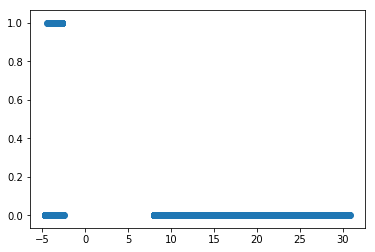

In [11]:
plt.scatter(X_pca[:, 0], X[:, 1])

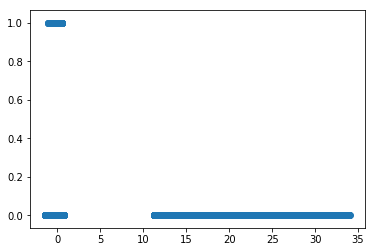

In [12]:
plt.scatter(X_svd[:, 0], X[:, 1])

The following code attempts to perform K-Means Clustering on the data.

0
13
0
13
0
0
0
13
0
13
0
13
0
0
0
13
0
0
0
0
0
0
0
0
0
0
0
0
0
13
0
0
0
7
7
0
0
13
13
7
7
13
7
0
13
7
7
13
7
13
13
7
0
0
31
13
13
13
13
13
0
7
7
7
13
7
13
13
13
0
0
0
7
13
13
32
7
0
13
13
13
13
13
0
13
13
13
13
7
7
13
7
31
13
13
7
31
13
13
13
7
15
15
13
15
15
13
13
15
15
32
7
15
15
13
15
15
13
15
15
13
15
15
13
15
15
15
15
15
15
7
15
15
13
7
15
15
15
15
15
15
15
15
13
15
15
15
15
13
15
15
13
13
15
15
15
15
15
15
15
13
15
15
15
15
32
13
15
15
15
15
13
15
15
15
15
15
15
13
13
15
15
15
13
15
15
15
15
13
15
15
15
15
15
13
15
15
15
15
15
15
13
0
0
0
15
31
0
0
0
15
13
0
0
0
15
13
0
0
0
15
13
0
0
0
15
13
0
0
0
15
13
0
0
0
15
31
13
0
0
15
15
0
0
0
15
15
0
0
0
15
15
7
0
0
15
31
0
0
0
15
31
0
0
0
15
7
0
0
0
15
15
0
0
0
15
15
0
0
0
15
15
0
0
0
15
13
0
0
0
15
13
0
0
0
15
7
0
0
0
0
0
13
13
13
0
0
13
13
7
0
0
7
13
0
0
13
7
0
0
13
13
0
0
13
13
0
0
13
32
0
0
13
13
0
0
13
7
13
0
0
7
13
0
0
13
13
0
0
13
13
0
0
13
32
13
0
13
13
0
0
0
13
13
0
0
13
32
0
0
13
13
0
0
13
13
0
0
13
32
15
15
15
15
15
15
15
15


13
32
13
13
7
32
13
0
32
32
32
32
7
32
13
13
13
32
7
13
13
7
32
13
32
32
0
32
7
13
13
32
13
7
32
7
13
7
32
4
7
13
13
4
7
32
13
7
32
13
7
7
4
13
32
7
32
7
7
32
13
13
7
32
13
7
32
13
32
32
32
13
32
32
7
32
32
7
32
32
13
32
13
13
32
13
4
4
4
4
49
4
49
4
49
4
4
49
49
13
32
7
4
4
4
49
49
49
49
4
4
49
49
49
4
4
4
49
4
4
49
49
49
49
49
49
49
4
49
4
49
49
4
4
49
49
13
4
13
49
49
49
49
49
49
49
49
49
4
4
4
49
49
49
49
49
13
49
49
49
49
13
32
49
49
4
4
49
49
4
49
49
49
49
49
49
49
13
49
49
49
49
49
49
49
13
32
13
4
49
32
4
49
49
49
49
13
32
7
32
13
32
32
13
31
32
0
13
13
0
0
32
0
0
32
0
0
0
0
0
0
32
7
0
32
0
0
0
0
13
0
0
0
0
0
0
32
0
0
0
0
32
0
0
32
0
0
0
0
0
0
32
0
32
31
32
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
32
0
0
0
32
7
32
0
0
13
7
32
0
0
32
7
13
0
0
13
7
7
0
0
7
7
32
0
0
13
7
32
0
0
0
13
32
32
31
32
7
32
0
0
32
13
32
13
0
7
7
32
0
0
0
13
7
32
0
7
7
32
0
0
13
7
32
0
0
0
13
7
32
0
13
7
32
0
0
32
13
32
32
0
32
7
32
32
0
13
7
32
0
0
0
13
32
13
0
13
7
32
0
0

13
28
28
28
0
32
28
28
28
0
28
28
28
0
26
28
28
28
0
28
28
32
0
7
28
28
28
0
31
28
32
28
32
28
28
28
32
28
28
0
31
28
28
32
26
28
28
28
0
31
32
28
28
26
32
28
28
0
32
28
28
28
23
28
28
28
0
0
0
0
0
28
0
0
0
0
28
0
0
0
0
32
28
0
0
0
0
28
0
0
0
0
0
32
0
0
0
0
28
0
0
0
0
0
28
0
0
0
0
28
28
0
0
0
0
0
28
0
0
0
0
28
28
0
0
0
0
0
28
32
28
28
28
0
26
28
28
28
0
0
0
0
0
28
0
0
0
0
28
0
0
0
0
28
0
0
0
0
32
0
0
0
0
28
28
0
0
32
0
0
28
28
28
28
0
0
0
0
0
28
0
0
0
0
28
28
0
0
0
0
28
28
28
28
28
28
28
28
32
28
28
28
28
28
28
28
28
28
28
28
28
28
32
28
28
28
32
13
13
23
23
23
32
23
32
32
23
28
23
23
7
32
23
32
28
23
23
23
28
23
23
23
7
28
32
23
23
32
32
32
13
7
28
7
32
32
23
32
32
23
7
32
13
28
23
13
7
32
23
23
32
28
28
32
23
7
28
28
32
23
7
32
23
23
7
0
23
23
0
23
7
23
0
0
23
0
7
0
7
0
0
0
0
23
0
0
0
0
0
0
23
0
0
0
32
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
23
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
13
0
0
0
0
0
0
0
0
0
0
0
23
0
0
0
0
0
0
0
0
28
28
7
32
32
0
0
0
0
0
0
0
0
0
6
26
0
26
6
0
0
6

28
28
28
28
28
28
28
28
28
28
32
28
28
32
28
28
28
28
32
28
28
28
28
32
28
28
28
28
28
28
28
28
28
28
28
28
28
23
23
28
23
28
28
28
32
28
28
28
28
23
28
28
28
28
32
28
28
28
28
28
32
28
28
28
28
28
32
28
28
28
28
32
23
28
28
28
32
23
28
28
28
32
40
28
28
28
40
40
28
28
28
23
28
32
28
23
23
28
28
28
32
28
28
32
32
32
40
28
28
23
23
28
32
28
28
28
8
28
28
23
23
28
28
28
28
28
1
28
32
28
28
1
28
28
28
28
1
28
28
28
28
1
28
28
28
28
1
28
7
28
1
1
28
28
28
8
1
28
28
28
28
1
28
28
28
23
1
28
28
28
28
8
28
28
23
28
28
28
7
28
28
28
28
32
8
28
28
28
28
1
28
28
28
28
1
28
28
28
28
1
28
28
28
28
8
28
28
28
1
1
28
28
28
23
1
28
28
32
28
28
28
28
28
28
8
28
28
23
23
28
28
28
28
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
23
1
23
1
1
1
1
23
1
40
1
23
1
1
1
23
23
1
7
23
1
32
40
28
23
28
1
23
1
32
1
7
1
40
1
1
1
1
1
1
1
1
1
1
32
28
1
32
1
1
1
40
28
23
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28


17
40
17
17
17
40
40
22
17
23
17
17
40
17
17
40
17
22
17
17
17
22
17
40
40
22
28
22
28
23
17
17
40
23
28
28
22
28
17
23
40
28
22
23
28
40
23
23
17
17
17
23
28
22
28
22
28
28
28
40
28
28
40
28
28
28
28
11
28
28
28
11
28
28
28
28
28
11
28
32
28
28
28
32
11
28
28
28
28
11
11
28
28
31
11
22
28
28
28
28
28
11
22
31
28
31
11
28
28
28
28
11
28
28
28
31
28
23
28
28
28
28
28
11
40
31
28
28
11
11
28
28
28
28
11
11
28
28
28
28
11
11
28
28
28
28
11
11
40
40
11
22
28
28
28
28
28
11
28
28
28
28
11
22
28
28
28
28
28
11
23
28
28
28
28
28
11
28
28
28
28
28
11
11
11
11
11
22
11
11
11
11
40
11
11
11
23
11
11
11
11
40
11
11
11
11
40
11
11
11
22
11
11
11
11
11
11
11
11
40
11
11
11
11
22
40
11
11
11
23
11
11
11
11
40
11
11
11
11
40
40
40
11
11
11
11
40
11
11
11
11
40
40
40
11
11
11
23
40
11
11
11
11
23
11
11
11
11
22
11
11
11
40
40
11
11
11
11
40
11
11
11
11
40
17
40
22
17
22
17
17
17
40
17
40
22
17
17
17
17
22
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
40
17
17
17
17
17
17
17
17
17
17
17
1

9
37
37
23
9
37
37
22
22
9
22
23
9
37
37
22
23
9
22
37
23
23
23
22
9
23
37
37
37
37
23
22
37
22
23
37
37
22
23
9
37
37
37
22
9
22
37
22
22
9
9
9
9
9
9
9
9
9
9
22
9
9
9
9
9
9
9
9
23
9
9
9
9
9
9
9
9
9
9
9
37
9
9
23
9
9
9
9
37
9
9
9
9
9
9
37
9
9
37
9
9
9
9
9
9
9
9
22
9
9
37
9
9
23
9
9
9
9
46
9
9
9
9
9
9
23
9
9
9
9
9
9
9
9
9
37
9
9
9
9
37
9
9
37
9
9
37
9
9
23
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
22
37
37
37
37
37
37
37
37
37
37
22
37
37
22
22
28
23
28
28
17
17
37
37
37
37
22
28
28
37
37
37
22
22
28
28
17
17
37
37
37
22
37
22
37
37
37
22
37
22
37
37
37
22
37
37
37
37
23
28
28
17
17
37
23
28
28
17
17
37
37
37
37
37
37
23
40
28
37
37
37
37
22
28
17
17
37
37
37
22
40
28
28
40
28
28
28
17
17
22
22
28
32
17
17
37
40
28
28
17
31
28
28
28
17
17
37
22
28
28
17
17
17
22
40
28
28
17
17
28
28
28
17
17
17
17
37
37
37
22
17
17
37
37
37
37
22
22
28
28
17
31
23
23
28
28
17
17
40
37
37
37
22
28
28
28
17
17
37
37
37
37
37
48
28
17
17
28
28
17
17
28
17
17
17
37
37
37
22
17
37
37
37
40
17
37
22
37


46
37
46
37
37
37
46
46
22
37
48
31
37
37
46
22
37
37
37
37
22
46
46
37
46
46
37
37
48
37
37
22
46
37
46
37
37
37
37
37
48
40
37
22
22
37
37
40
48
40
37
37
37
48
40
40
22
48
37
37
48
37
37
40
22
40
37
37
48
40
40
37
37
22
37
40
48
48
37
40
37
48
48
48
37
48
48
37
37
48
22
37
37
40
48
40
48
37
37
48
40
40
37
40
22
48
37
22
37
48
22
40
37
37
48
40
40
37
40
22
40
22
37
37
22
48
48
37
37
40
22
48
22
22
22
40
22
48
45
14
45
14
48
45
14
14
14
45
45
14
14
14
22
14
14
14
14
22
14
45
14
14
48
14
45
14
45
40
14
14
45
45
40
14
45
14
45
48
14
14
45
45
22
45
14
14
14
22
14
45
45
14
40
45
14
45
14
22
14
14
45
14
45
14
45
45
14
22
14
45
14
45
48
14
14
45
14
14
14
45
14
14
48
14
14
14
14
48
14
14
45
45
48
14
45
14
45
45
17
14
48
45
48
14
17
14
17
48
45
17
14
17
17
17
17
45
17
45
17
45
17
14
17
17
17
17
17
17
17
17
17
17
45
17
17
17
17
14
48
22
17
17
17
14
17
17
17
17
45
48
17
22
17
17
17
40
17
17
40
17
17
17
17
17
22
45
22
17
17
17
17
17
17
17
17
17
17
22
17
17
22
37
37
37
17
17
22
37
22
17
22
17
17
1

48
37
35
41
41
41
37
35
35
48
12
37
35
48
41
37
37
35
41
41
48
37
35
41
48
41
37
35
41
41
12
37
35
41
41
48
37
35
41
48
41
37
35
12
12
37
37
35
12
41
37
37
35
48
12
37
37
37
37
37
37
37
37
37
37
37
37
37
35
37
37
31
35
37
37
37
35
37
37
31
35
37
37
37
31
37
37
37
37
35
37
37
37
35
35
37
37
37
35
37
37
37
48
37
37
37
37
22
37
22
35
37
37
37
37
35
37
37
37
37
31
35
37
37
37
37
37
37
37
40
35
37
37
37
37
35
35
37
37
37
37
37
22
37
35
37
37
37
35
35
35
35
35
35
35
41
35
35
35
35
35
35
35
35
35
35
3
41
35
41
48
35
35
46
35
35
35
48
48
35
12
37
35
35
35
41
37
12
35
35
41
3
37
35
41
12
37
35
35
41
37
41
48
35
41
3
22
35
35
35
41
35
41
41
35
35
35
35
35
12
48
35
35
41
48
48
35
41
12
35
12
3
41
35
41
12
48
41
35
41
41
37
35
41
41
41
37
46
35
41
12
37
35
35
35
48
48
37
37
37
37
37
37
37
37
37
37
22
37
37
31
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
31
31
37
37
37
37
37
37
37
48
37
37
37
37
48
37
37
22
31
31
37
37
31
37
31
37
37
41
37
37
31
37
48
37
37
22
37
37
37
37
31
37
31
31
41
37

12
3
3
3
3
33
3
41
41
3
10
5
5
5
41
12
3
41
3
41
41
41
5
5
5
5
12
41
33
41
41
41
3
41
41
3
41
12
5
5
5
5
41
3
12
3
12
41
12
3
3
41
41
41
3
41
5
5
5
41
3
3
41
41
3
41
12
5
5
5
5
41
41
41
41
41
12
3
41
5
5
5
5
41
41
41
5
3
41
5
41
41
5
3
41
5
41
3
3
5
3
41
41
41
5
3
41
5
3
41
3
41
3
41
41
5
41
3
5
41
3
5
41
12
3
3
5
41
41
41
5
5
41
41
41
41
41
41
3
5
41
41
3
12
5
5
5
5
5
5
41
41
41
5
5
5
5
5
5
5
41
41
41
33
41
5
5
5
5
41
5
5
12
41
5
5
5
5
12
41
41
41
41
41
10
5
5
5
5
5
5
5
5
5
5
5
5
5
3
41
5
5
5
5
5
5
5
5
5
3
41
41
5
5
5
5
5
5
5
5
5
5
5
5
5
12
41
41
5
5
5
5
5
5
5
5
5
41
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
5
10
5
41
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
10
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
41
5
5
5
5
5
41
5
5
5
5
5
5
5
41
5
5
41
41
5
5
5
5
5
5
5
5
41
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
41
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
41
5
5
41
41
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5

33
25
25
25
25
25
25
25
25
25
25
10
25
25
25
25
25
25
25
25
25
25
25
25
25
33
25
25
25
25
25
25
25
25
25
25
25
25
33
33
25
10
25
33
33
25
25
25
10
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
33
25
25
25
25
25
25
25
25
25
25
25
25
10
25
25
25
33
33
25
25
25
25
33
25
25
25
25
25
25
25
25
25
33
25
25
25
25
25
25
25
25
25
25
25
33
25
25
25
33
33
25
25
25
25
20
25
33
25
25
25
25
25
25
25
25
29
25
25
25
25
25
25
25
25
25
25
25
25
25
33
29
25
25
10
25
33
33
25
33
25
25
33
25
25
25
25
25
25
25
25
25
25
25
25
25
33
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
20
25
25
29
25
33
33
33
33
25
25
25
25
25
33
25
25
25
33
33
33
20
33
25
43
43
33
33
33
33
25
33
33
43
33
33
33
33
33
33
25
33
20
25
33
25
33
29
33
43
25
33
33
33
33
33
29
25
33
33
43
33
33
20
33
29
33
33
25
33
33
20
33
25
33
43
20
33
29
33
33
33
25
33
43
33
33
33
29
33
33
33
20
33
33
29
43
25
29
43
29
25
25
25
29
29
25
33
33
25
29
29
25
25
25
29
25
20
25
25
20
25
25
25
25
25
33
33
25
25
25
25
25
25
25
25
33
2

18
18
18
18
18
18
18
18
18
18
20
20
18
18
18
18
18
18
18
18
20
18
18
18
43
18
18
20
18
18
18
43
18
18
18
20
18
20
18
43
18
18
18
18
18
18
20
29
43
18
43
20
18
18
18
43
18
18
20
18
18
43
18
43
18
18
18
29
29
18
18
18
20
43
18
18
18
18
20
18
18
18
18
18
29
43
18
18
20
18
20
20
18
18
10
18
20
20
20
43
18
20
43
18
18
29
43
18
18
43
43
20
18
20
29
29
18
20
20
43
29
43
20
18
18
43
29
18
18
20
43
43
18
43
20
18
18
43
20
18
18
18
43
43
20
18
20
43
29
18
18
43
43
18
18
29
43
29
18
18
18
18
20
20
29
20
18
18
18
18
18
43
43
43
18
18
43
43
43
18
20
18
18
43
43
18
18
18
18
18
43
29
18
18
18
18
20
18
18
18
18
43
43
18
29
43
20
29
18
20
43
20
43
18
18
43
20
10
18
18
18
29
29
20
18
18
43
18
18
18
43
43
20
18
18
18
18
43
18
18
43
20
20
29
18
18
18
43
18
18
18
43
29
18
18
29
20
18
18
29
29
20
18
18
18
43
20
29
18
18
18
18
20
18
18
43
29
20
18
20
29
29
10
18
18
18
18
20
18
18
18
20
18
20
43
20
29
18
18
43
43
18
18
43
29
20
18
29
43
43
18
18
43
43
20
18
18
29
43
20
43
18
18
43
20
43
18
43
20
43
18
18
20
4

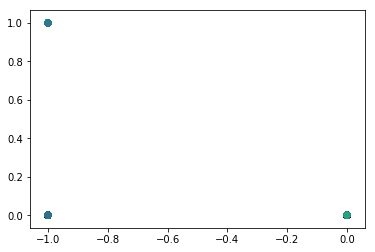

In [17]:
from sklearn import cluster

k_means = cluster.MiniBatchKMeans(n_clusters=50)
k_means.fit_transform(X_svd)
labels = k_means.labels_
centroids = k_means.cluster_centers_

plt.scatter(X[:,0],X[:,1],c=k_means.labels_)

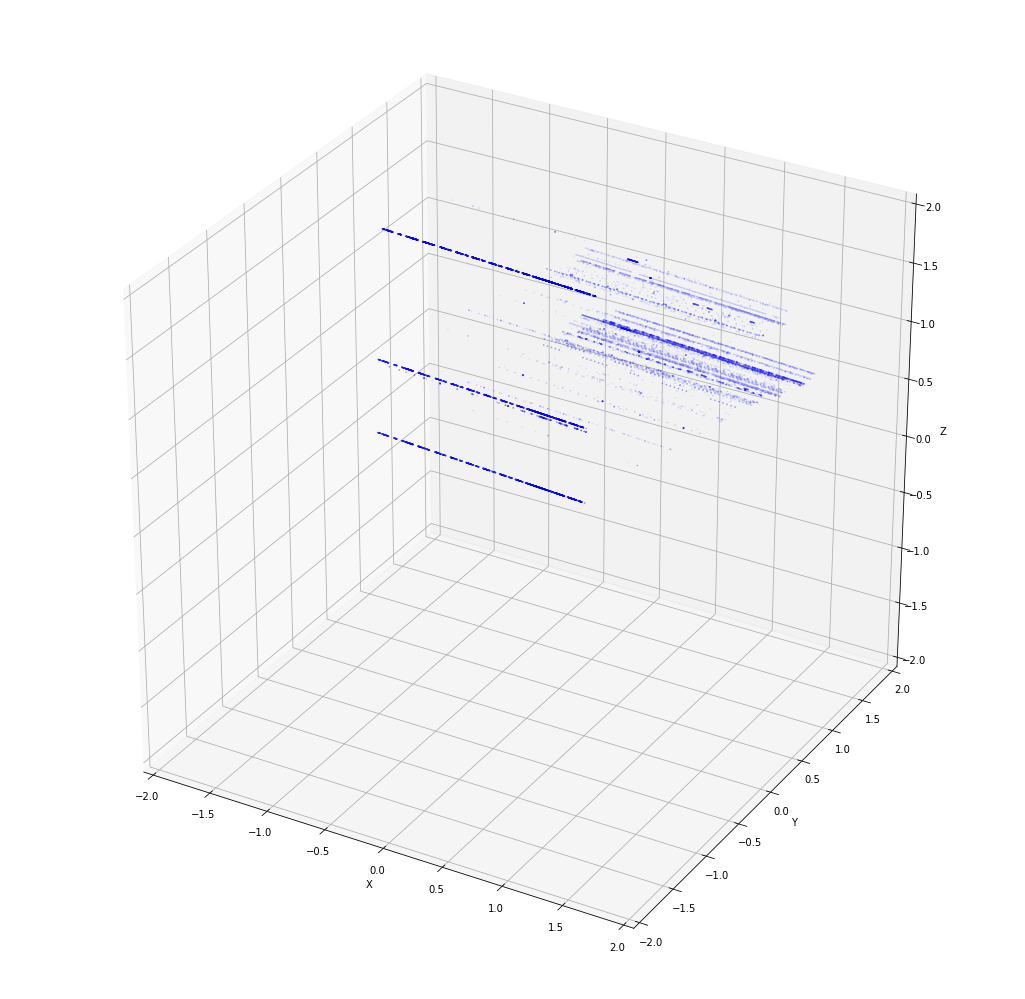

In [19]:
# Prepare sample data - normally distributed
vmin, vmax = -2, 2

# Create figure, add subplot with 3d projection
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(vmin, vmax)
ax.set_ylim(vmin, vmax)
ax.set_zlim(vmin, vmax)

# Plot the data cloud
ax.scatter(X_svd_3[:, 0], X_svd_3[:, 1], X_svd_3[:, 2], s=.3, alpha=.1, edgecolor='b', facecolor='w', color='k')


Let us now fit a KNN based model to our data

In [20]:
nbrs = NearestNeighbors(n_neighbors=50, algorithm='ball_tree').fit(X_svd)
distances, indices = nbrs.kneighbors(X_svd)
for i in xrange(5):
    print indices[i]
    print distances[i]
    


[  0  30  35  28  31  14  52  26  16  10  53   6  20  24  23  22   8  69
   4  18  12   2 217  25 247 267 272 212 282 202  70 227  13  21 277 222
 297 242 287  17 273 262 253 248 278 268 203 257 243 218]
[  0.00000000e+00   9.16479580e-13   9.16479580e-13   9.16479580e-13
   9.16479580e-13   9.16479580e-13   9.16479580e-13   9.16479580e-13
   9.16479580e-13   9.16479580e-13   9.16479580e-13   9.16479580e-13
   9.16479580e-13   9.16479580e-13   9.16479580e-13   9.16479580e-13
   9.16479580e-13   9.16479580e-13   9.16479580e-13   9.16479580e-13
   9.16479580e-13   9.16506356e-13   1.24066896e-03   1.24066896e-03
   1.24066896e-03   1.24066896e-03   1.24066896e-03   1.24066896e-03
   1.24066896e-03   1.24066896e-03   1.24066896e-03   1.24066896e-03
   1.24066896e-03   1.24066896e-03   1.24066896e-03   1.24066896e-03
   1.24066896e-03   1.24066896e-03   1.24066896e-03   1.24066896e-03
   2.48133792e-03   2.48133792e-03   2.48133792e-03   2.48133792e-03
   2.48133792e-03   2.48133792e-03   

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

y = range(len(X_svd[:,0]))
X_svd_train, X_svd_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_svd_train)
y_pred_train = clf.predict(X_svd_train)
y_pred_test = clf.predict(X_svd_test)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size


0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1

0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 

-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1

0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.

0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -

0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0


0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.

0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -

0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.

-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 

0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0

0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0


0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -

0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.

-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0


0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.

-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0


0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.

-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.

-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.

0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -1.0
-1.0 -1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0 -

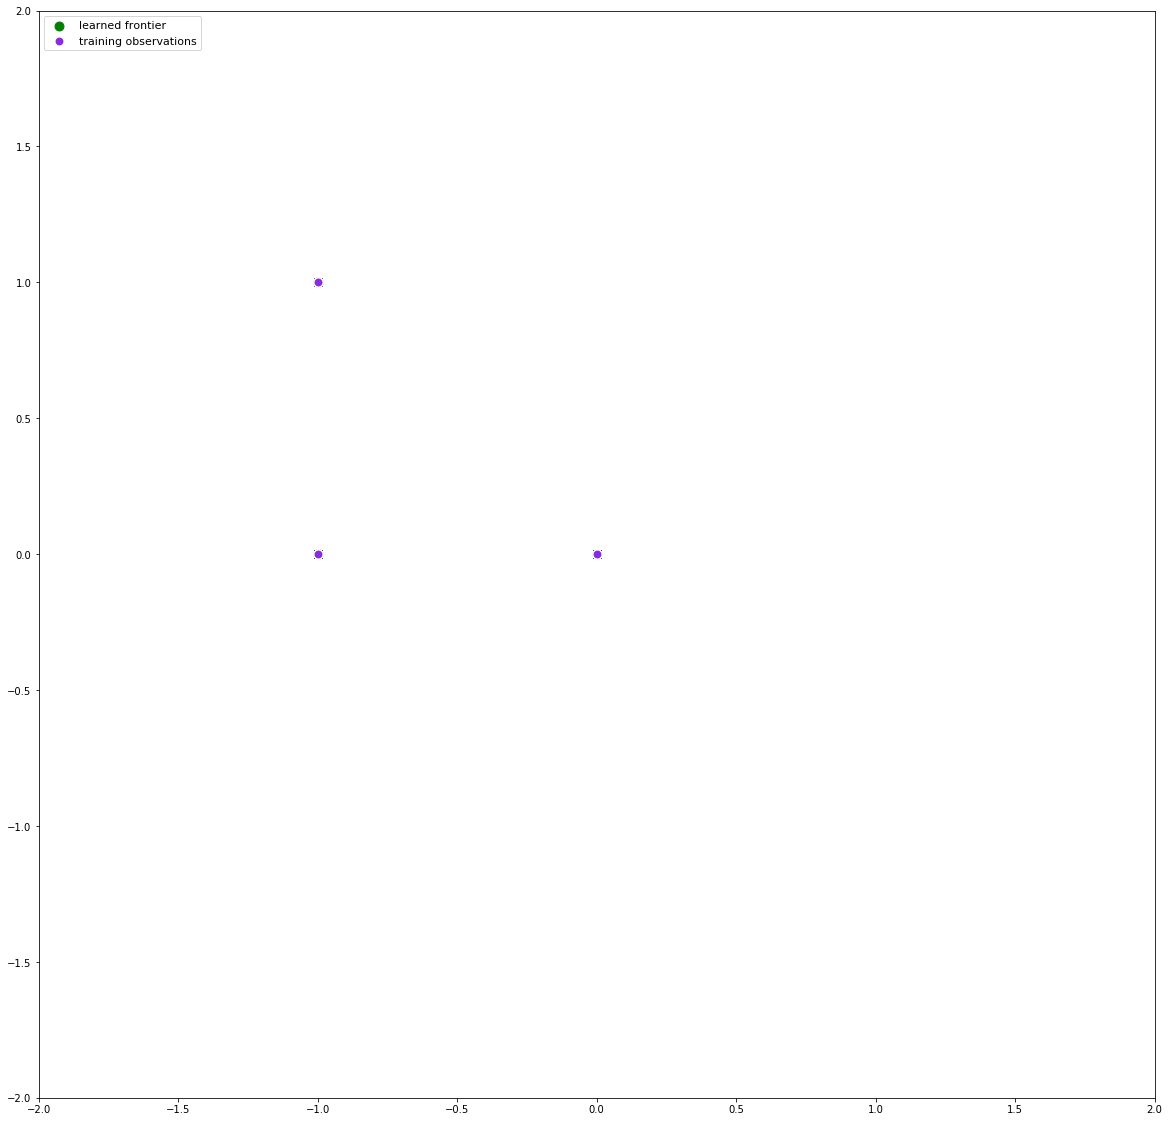

In [36]:
s = 80
plt.figure(figsize=(20,20))


b1 = plt.scatter(X_svd_train[:, 0], X_svd_train[:, 1], c='green', s=s)
b2 = plt.scatter(X_svd_test[:, 0], X_svd_test[:, 1], c='blueviolet',edgecolor='w', s=s)
    
plt.axis('tight')
plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.legend([b1, b2],
           ["learned frontier", "training observations",
            "new regular observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))

plt.show()